 
# Leasing Price Predictor
**Data Science Lab**
  - Tobias Ponesch
  - Sina Haghgoo
  - Finnian John Dempsey
  - Adrian Lehrner
---

# Inhaltsverzeichnis

1. [Import Libraries](#import-libraries)
2. [Computational effort](#computational-effort)
3. [Überschrift 3](#überschrift-3)


## 1 Import Libraries<a id="import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np

#Sklearn Preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Sklearn model builder:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#XGB model
from xgboost import XGBRegressor

#Sklearn metrics:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import make_scorer

#Model evaluation
import shap
from sklearn.metrics import PredictionErrorDisplay

#from sklearn.preprocessing import FunctionTransformer
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler


#from sklearn.preprocessing import OneHotEncoder

#Other helper libraries
from dateutil.relativedelta import relativedelta
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
from joblib import dump, load
import multiprocessing
import psutil
import threading
import time
import os

c:\Users\Tobia\anaconda3\envs\py39\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Tobia\anaconda3\envs\py39\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_mask

In [2]:
#!pip install --upgrade seaborn

---

## 2 Computational effort<a id="computational-effort"></a>

In [3]:
# Just execute this cell
allowed_values = ["ludicrous", "high", "medium", "low"]

comp_effort = input("Enter your computational performance (High, Medium, or Low): ")
comp_effort = comp_effort.lower()

while comp_effort not in allowed_values:
    print("Invalid input. Please try again.")
    comp_effort = input("Enter your computational performance (Ludicrous, High, Medium, or Low): ")
    comp_effort = comp_effort.lower()

# The user input is valid
print("Your computational performance:", comp_effort)

#To ensure machine usability while executing models, we define usable cores
available_cores = multiprocessing.cpu_count()

calc_models = input("If you want to compute the models, enter \"Yes\". If you want to load the existing models, enter \"No\":")
calc_models = calc_models.lower()
allowed=["yes", "no"]
while calc_models not in allowed:
    print("Invalid input. Please try again.")
    calc_models = input("If you want to compute the models, enter \"Yes\". If you want to load the existing models, enter \"No\":")
    calc_models.lower()

if calc_models == "yes":
    compute = True
else:
    compute = False    

Your computational performance: high


***

## 3 Dataset import <a id="dataset-import"></a>

In [4]:
datafolder = "data"
modelfolder = "models/test"

In [5]:
df = pd.read_excel(f'{datafolder}/dataset_2023.xlsx')
df = df.drop('Unnamed: 0', axis = 1)
df

brand_name                         model_name      milage   
0           Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km  \
1      Volkswagen                T-Cross VW Life TSI      201 km   
2            Seat              Ibiza Austria Edition   15.000 km   
3      Volkswagen                            Polo VW        1 km   
4            Audi     A4 Avant 40 TDI quattro S line  105.301 km   
...           ...                                ...         ...   
19053        Seat        Ateca FR 2.0 TDI DSG 4Drive      201 km   
19054       Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km   
19055        Audi     A4 Avant 40 TDI quattro S line  105.301 km   
19056  Volkswagen                            Polo VW   18.903 km   
19057  Volkswagen                 Tiguan VW Life TDI   48.000 km   

      first_registration              duration                gear   
0                03/2023  48 Monat (anpassbar)           Automatik  \
1                03/2023  48 Monat (anpassbar)  Manuelle Schaltung   
2                10/2022  48 Monat (anpassbar)  Manuelle Schaltung   
3                01/2023  48 Monat (anpassbar)  Manuelle Schaltung   
4                12/2019  48 Monat (anpassbar)           Automatik   
...                  ...                   ...                 ...   
19053            01/2023  48 Monat (anpassbar)           Automatik   
19054            03/2023  48 Monat (anpassbar)           Automatik   
19055            12/2019  48 Monat (anpassbar)           Automatik   
19056            06/2020  48 Monat (anpassbar)  Manuelle Schaltung   
19057            09/2022  48 Monat (anpassbar)  Manuelle Schaltung   

      monthly_fee emission_value   consumption horsepower kilowatts fuel_type  
0        574,01 €       119 g/km  5,0 l/100 km     150 PS    110 kW    Diesel  
1        382,58 €       131 g/km  6,0 l/100 km      95 PS     70 kW    Benzin  
2        239,62 €       120 g/km  5,0 l/100 km      80 PS     59 kW    Benzin  
3        309,11 €       127 g/km  6,0 l/100 km      80 PS     59 kW    Benzin  
4        587,75 €       138 g/km  5,0 l/100 km     190 PS    140 kW    Diesel  
...           ...            ...           ...        ...       ...       ...  
19053    692,03 €       146 g/km  6,0 l/100 km     150 PS    110 kW    Diesel  
19054    574,01 €       187 g/km  8,0 l/100 km     150 PS    110 kW    Diesel  
19055    587,75 €       143 g/km  6,0 l/100 km     190 PS    140 kW    Diesel  
19056    256,33 €        40 g/km  2,0 l/100 km      80 PS     59 kW    Benzin  
19057    539,72 €       185 g/km  8,0 l/100 km     122 PS     90 kW    Diesel  

[19058 rows x 12 columns]

In [6]:
#Enter the actual column names
brand = "brand_name"
model = "model_name"
milage = "milage"
registration = "first_registration"
duration = "duration"
gear = "gear"
fee = "monthly_fee"
emission = "emission_value"
consumption = "consumption"
horsepower = "horsepower"
kilowatts = "kilowatts"
fuel = "fuel_type"

rename_columns = {
    brand:"brand",
    model:"model",
    milage:"milage",
    registration:"registration",
    duration:"duration",
    gear:"gear",
    fee:"fee",
    emission:"emission",
    consumption:"consumption",
    horsepower:"horsepower",
    kilowatts:"kilowatts",
    fuel:"fuel"
}

df = df.rename(columns=rename_columns)
df

brand                              model      milage registration   
0           Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km      03/2023  \
1      Volkswagen                T-Cross VW Life TSI      201 km      03/2023   
2            Seat              Ibiza Austria Edition   15.000 km      10/2022   
3      Volkswagen                            Polo VW        1 km      01/2023   
4            Audi     A4 Avant 40 TDI quattro S line  105.301 km      12/2019   
...           ...                                ...         ...          ...   
19053        Seat        Ateca FR 2.0 TDI DSG 4Drive      201 km      01/2023   
19054       Skoda  Octavia ŠKODA Combi Style TDI DSG      201 km      03/2023   
19055        Audi     A4 Avant 40 TDI quattro S line  105.301 km      12/2019   
19056  Volkswagen                            Polo VW   18.903 km      06/2020   
19057  Volkswagen                 Tiguan VW Life TDI   48.000 km      09/2022   

                   duration                gear       fee  emission   
0      48 Monat (anpassbar)           Automatik  574,01 €  119 g/km  \
1      48 Monat (anpassbar)  Manuelle Schaltung  382,58 €  131 g/km   
2      48 Monat (anpassbar)  Manuelle Schaltung  239,62 €  120 g/km   
3      48 Monat (anpassbar)  Manuelle Schaltung  309,11 €  127 g/km   
4      48 Monat (anpassbar)           Automatik  587,75 €  138 g/km   
...                     ...                 ...       ...       ...   
19053  48 Monat (anpassbar)           Automatik  692,03 €  146 g/km   
19054  48 Monat (anpassbar)           Automatik  574,01 €  187 g/km   
19055  48 Monat (anpassbar)           Automatik  587,75 €  143 g/km   
19056  48 Monat (anpassbar)  Manuelle Schaltung  256,33 €   40 g/km   
19057  48 Monat (anpassbar)  Manuelle Schaltung  539,72 €  185 g/km   

        consumption horsepower kilowatts    fuel  
0      5,0 l/100 km     150 PS    110 kW  Diesel  
1      6,0 l/100 km      95 PS     70 kW  Benzin  
2      5,0 l/100 km      80 PS     59 kW  Benzin  
3      6,0 l/100 km      80 PS     59 kW  Benzin  
4      5,0 l/100 km     190 PS    140 kW  Diesel  
...             ...        ...       ...     ...  
19053  6,0 l/100 km     150 PS    110 kW  Diesel  
19054  8,0 l/100 km     150 PS    110 kW  Diesel  
19055  6,0 l/100 km     190 PS    140 kW  Diesel  
19056  2,0 l/100 km      80 PS     59 kW  Benzin  
19057  8,0 l/100 km     122 PS     90 kW  Diesel  

[19058 rows x 12 columns]

In [7]:
SEED = 2023
TARGET_name = "fee"
FEATURE_names = df.drop(TARGET_name, axis=1).columns

***

## 4 Basic Preprocessing<a id="basic-preprocessing"></a>

In [8]:
class CalculateAge(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        pass
    
    def transform(self, X, y=None):
        print(self.columns)
        def calculate_age(registration_date):
            if registration_date == "Neuwagen":
                return 0
            else:
                today = datetime.now()
                date = datetime.strptime(registration_date, "%m/%Y")
                delta = relativedelta(today, date)
                return (delta.years * 12) + delta.months
        Xc = X.copy()
        if self.columns:
            columns = self.columns
        else:
            columns = Xc.columns
        Xc[columns[0]] = Xc[columns[0]].replace(["","nan"], np.nan)
        Xc[columns[0]] = Xc[columns[0]].apply(calculate_age)
        return Xc

class RemoveUnits(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def extractFloats(input):
            try:
                input = input.split(" ")[0]
                f = float(input.replace('.','').replace(',','.'))
                return(f)
            except AttributeError:
                return input        
        
        X_=X.copy()
        columns = X.columns
        X_[columns] = X_[columns].apply(lambda col: col.replace(["","nan"], np.nan))
        X_[columns] = X_[columns].apply(lambda col: col.apply(extractFloats))
        return X_
        
    def get_feature_names_out(self):
        pass
       

In [9]:
units = ["milage", "duration", "fee", "emission", "consumption", "horsepower", "kilowatts"]

basicpreprocessor = ColumnTransformer(
    transformers=[
        ('age', CalculateAge(),["registration"]),
        ('unit', RemoveUnits(),units)
    ],
    remainder = "passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

df = basicpreprocessor.fit_transform(df)
df.head()

None


registration    milage  duration     fee  emission  consumption   
0             2     201.0      48.0  574.01     119.0          5.0  \
1             2     201.0      48.0  382.58     131.0          6.0   
2             7   15000.0      48.0  239.62     120.0          5.0   
3             4       1.0      48.0  309.11     127.0          6.0   
4            41  105301.0      48.0  587.75     138.0          5.0   

   horsepower  kilowatts       brand                              model   
0       150.0      110.0       Skoda  Octavia ŠKODA Combi Style TDI DSG  \
1        95.0       70.0  Volkswagen                T-Cross VW Life TSI   
2        80.0       59.0        Seat              Ibiza Austria Edition   
3        80.0       59.0  Volkswagen                            Polo VW   
4       190.0      140.0        Audi     A4 Avant 40 TDI quattro S line   

                 gear    fuel  
0           Automatik  Diesel  
1  Manuelle Schaltung  Benzin  
2  Manuelle Schaltung  Benzin  
3  Manuelle Schaltung  Benzin  
4           Automatik  Diesel

In [10]:
basicpreprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age', CalculateAge(), ['registration']),
                                ('unit', RemoveUnits(),
                                 ['milage', 'duration', 'fee', 'emission',
                                  'consumption', 'horsepower', 'kilowatts'])],
                  verbose_feature_names_out=False)

In [11]:
TARGET = pd.DataFrame(df["fee"])
num_FEATURES = df[df.select_dtypes(include=['float64', 'int64']).columns].drop("fee", axis=1)
cat_FEATURES = df[df.select_dtypes(exclude=['float64', 'int64']).columns]

***

## 5 Explanatory Data Analysis<a id="explanatory-analysis"></a>

### 5.1 The Traget variable <a id="target-variable"></a>

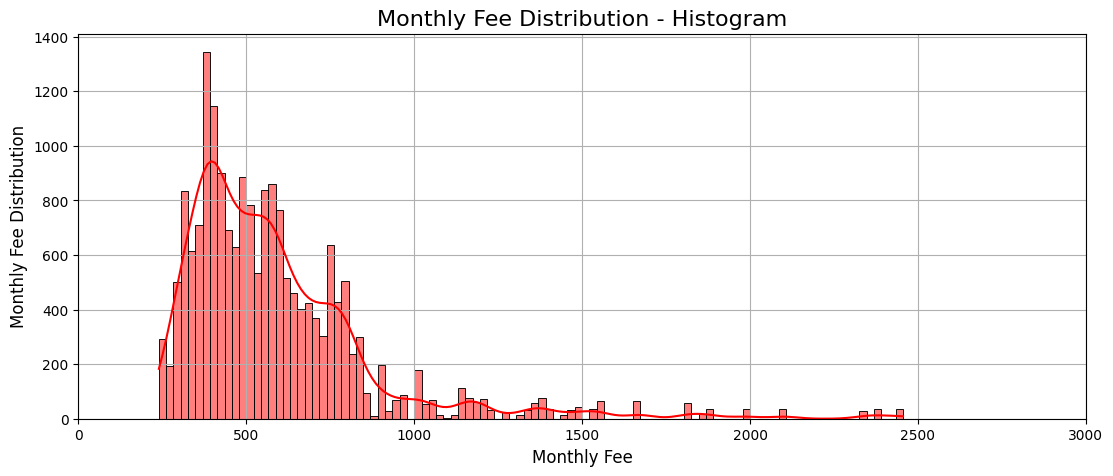

In [12]:
# Histogram
hist_color = 'red'
title_font_size = 16
label_font_size = 12
plt.figure(figsize=(13,5))
sns.histplot(TARGET['fee'], kde=True, color=hist_color)
plt.title('Monthly Fee Distribution - Histogram', fontsize=title_font_size)
plt.xlabel('Monthly Fee', fontsize=label_font_size)
plt.xticks(ticks=plt.xticks()[0][::1])  
plt.ylabel('Monthly Fee Distribution', fontsize=label_font_size)
plt.grid(True)
plt.show()

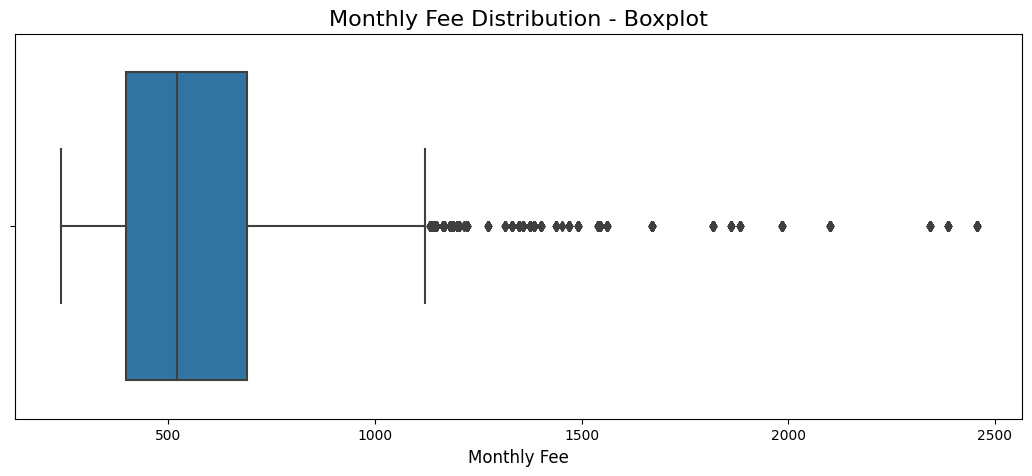

In [13]:
# Boxplot
plt.figure(figsize=(13,5))
sns.boxplot(x=df['fee'])
plt.title('Monthly Fee Distribution - Boxplot', fontsize=title_font_size)
plt.xlabel('Monthly Fee', fontsize=label_font_size)
plt.show()

### 5.2 Numerical Features <a id="numerical-features"></a>

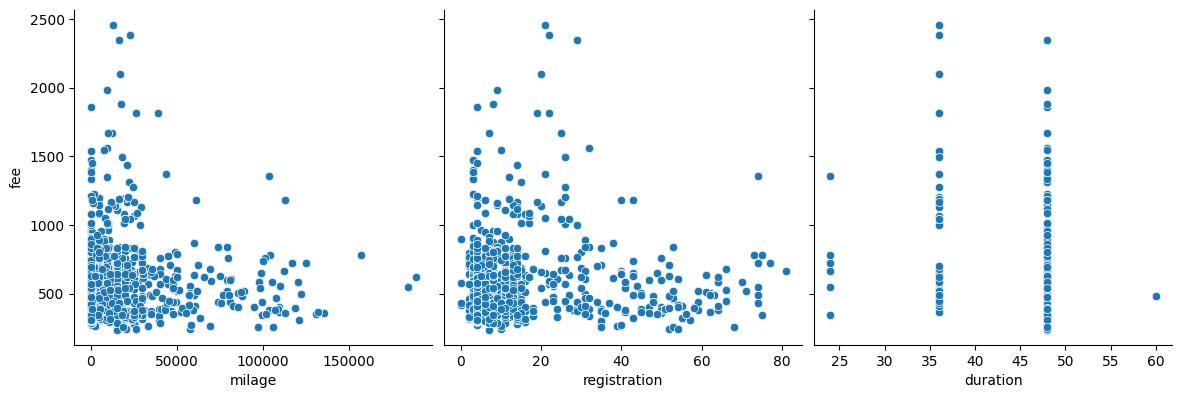

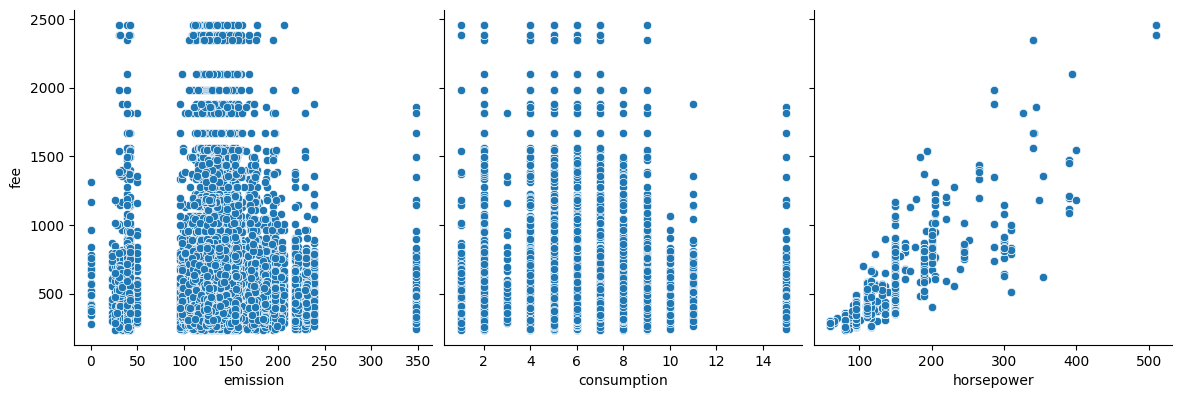

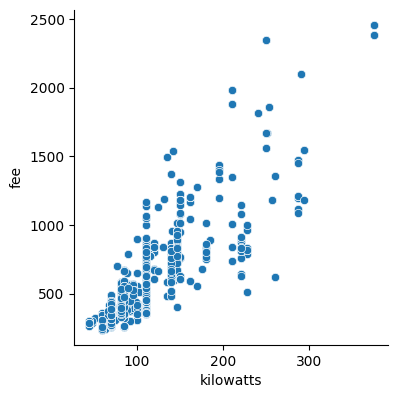

In [14]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('milage', 'registration', 'duration')
pp('emission', 'consumption', 'horsepower')

def pp(x):
    sns.pairplot(df, x_vars=[x], y_vars='fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('kilowatts')

#### 5.2.1 Skewness of numerical variables <a id="skewness"></a>

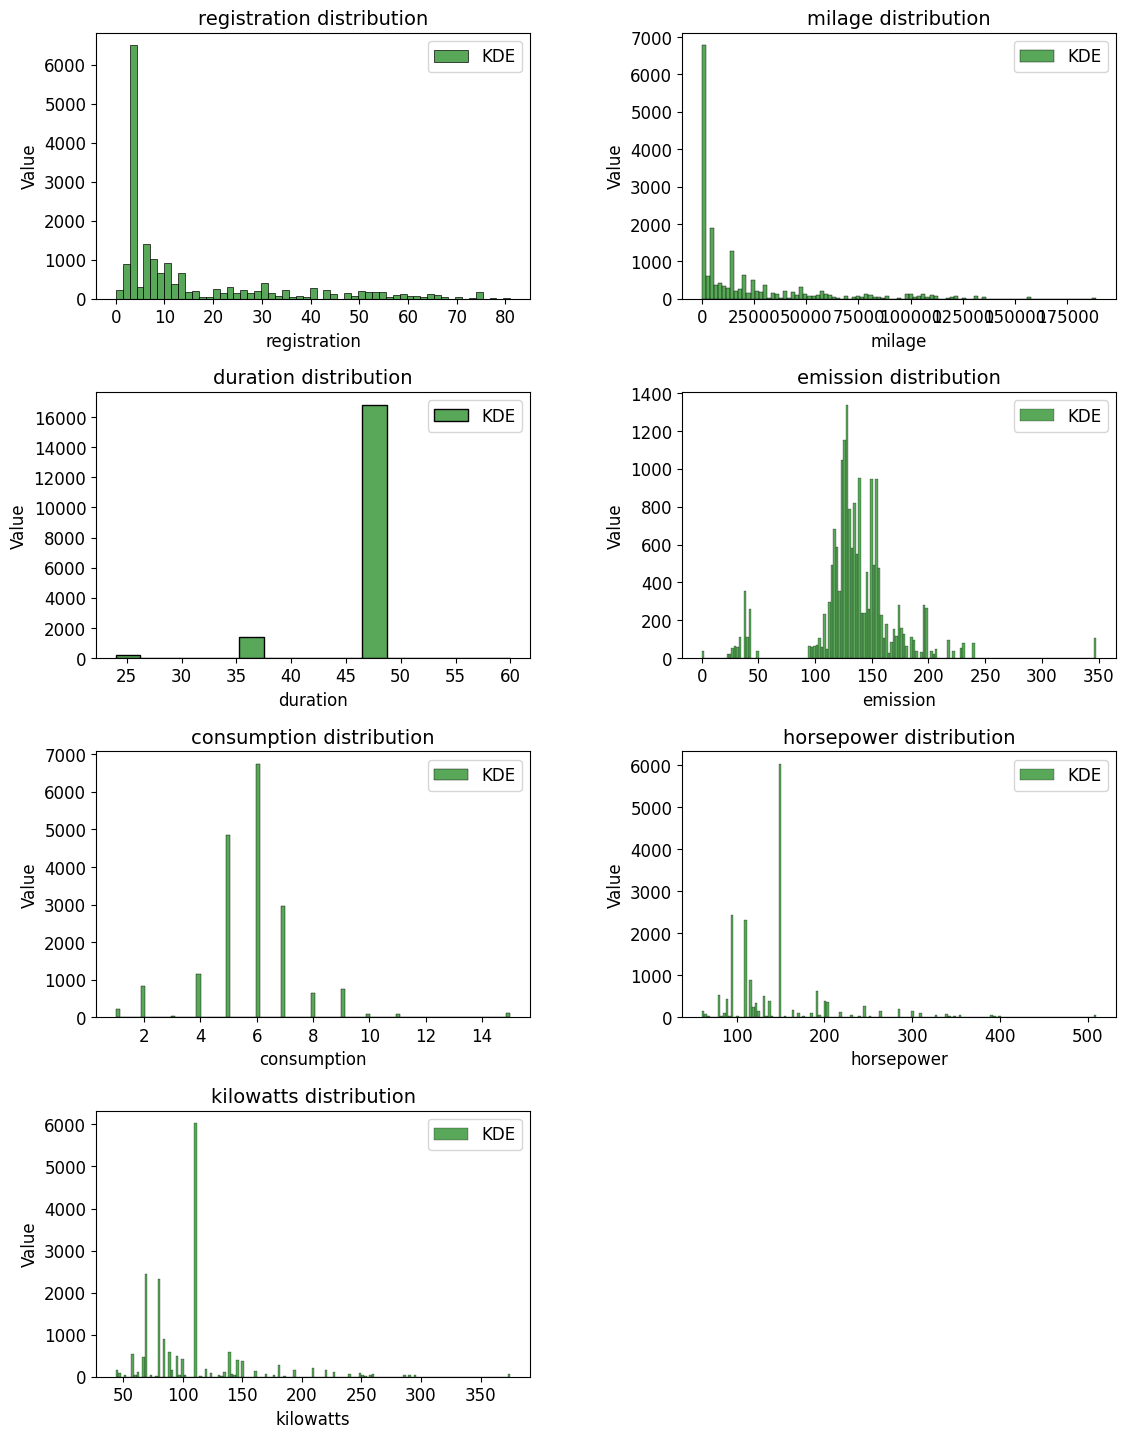

In [15]:
num_FEATURES_hist = num_FEATURES.dropna()

plt.figure(figsize=(12,16))

for i, col in enumerate(num_FEATURES_hist.columns):
    # TAKE A LOOK AT THE IDX VARIABLE!!!!!!
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.histplot(num_FEATURES_hist[col], color='forestgreen', kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

### 5.3 Categporical Features <a id="categorical-features"></a>

In [16]:
cat_FEATURES

brand                              model                gear   
0           Skoda  Octavia ŠKODA Combi Style TDI DSG           Automatik  \
1      Volkswagen                T-Cross VW Life TSI  Manuelle Schaltung   
2            Seat              Ibiza Austria Edition  Manuelle Schaltung   
3      Volkswagen                            Polo VW  Manuelle Schaltung   
4            Audi     A4 Avant 40 TDI quattro S line           Automatik   
...           ...                                ...                 ...   
19053        Seat        Ateca FR 2.0 TDI DSG 4Drive           Automatik   
19054       Skoda  Octavia ŠKODA Combi Style TDI DSG           Automatik   
19055        Audi     A4 Avant 40 TDI quattro S line           Automatik   
19056  Volkswagen                            Polo VW  Manuelle Schaltung   
19057  Volkswagen                 Tiguan VW Life TDI  Manuelle Schaltung   

         fuel  
0      Diesel  
1      Benzin  
2      Benzin  
3      Benzin  
4      Diesel  
...       ...  
19053  Diesel  
19054  Diesel  
19055  Diesel  
19056  Benzin  
19057  Diesel  

[19058 rows x 4 columns]

Text(0.5, 1.0, 'Gear Frequencies')

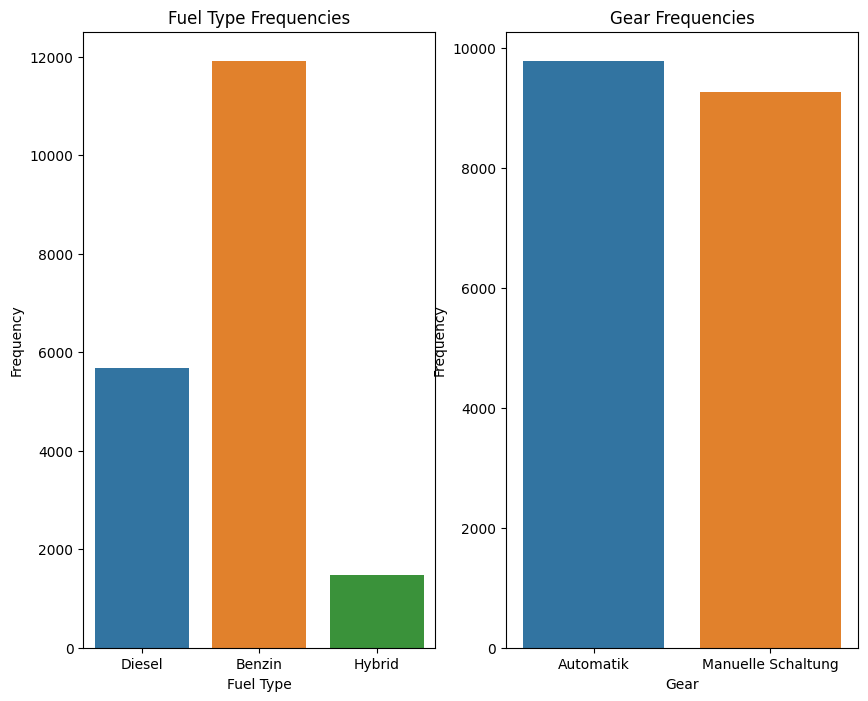

In [17]:
# Create subplots for each categorical variable

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))

# Fuel type barplot
sns.countplot(x='fuel', data=cat_FEATURES, ax=axs[0])
axs[0].set_xlabel('Fuel Type')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Fuel Type Frequencies')

# Gear barplot
sns.countplot(x='gear', data=cat_FEATURES, ax=axs[1])
axs[1].set_xlabel('Gear')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Gear Frequencies')

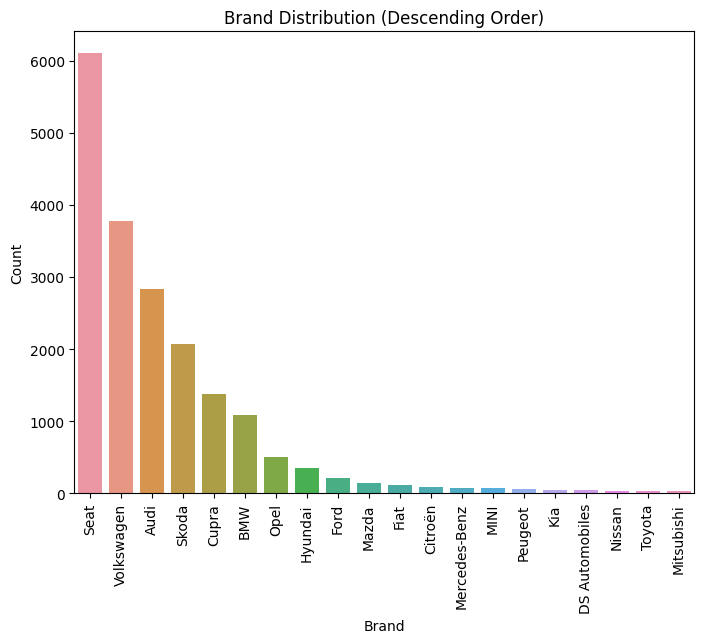

In [18]:
# Distribution of brands
brand_counts = df['brand'].value_counts()

brand_counts = brand_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='brand', order=brand_counts.index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution (Descending Order)')
plt.xticks(rotation=90)
plt.show()




### 5.4 Target variable vs. categorical features <a id="target-cat"></a>

<Figure size 2500x600 with 0 Axes>

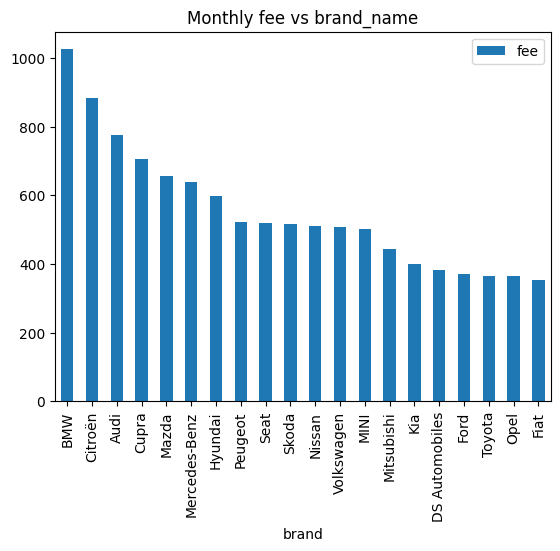

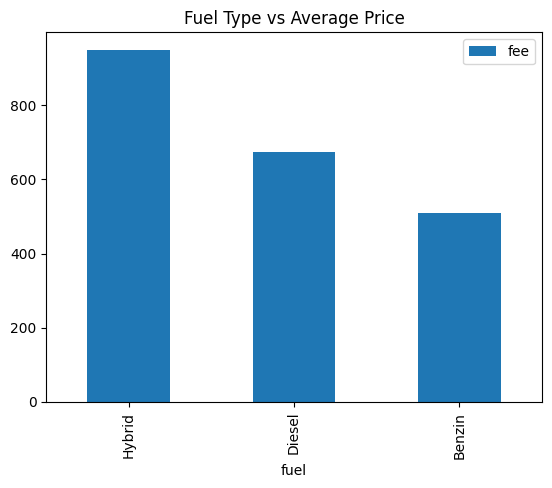

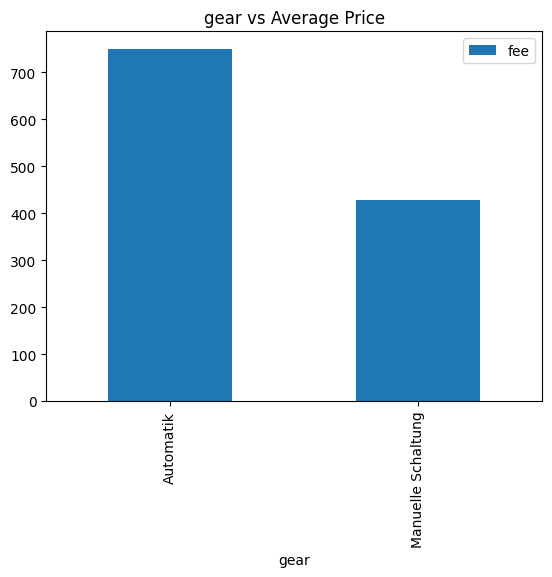

In [19]:
plt.figure(figsize=(25, 6))

df_brand = pd.DataFrame(df.groupby(['brand'])['fee'].mean().sort_values(ascending = False))
df_brand.plot.bar()
plt.title('Monthly fee vs brand_name')
plt.show()

df_fueltype = pd.DataFrame(df.groupby(['fuel'])['fee'].mean().sort_values(ascending = False))
df_fueltype.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df_gear = pd.DataFrame(df.groupby(['gear'])['fee'].mean().sort_values(ascending = False))
df_gear.plot.bar()
plt.title('gear vs Average Price')
plt.show()

### 5.5 Heatmap (Correlations) <a id="heatmap"></a>

In [20]:
num_FEATURES

registration    milage  duration  emission  consumption  horsepower   
0                 2     201.0      48.0     119.0          5.0       150.0  \
1                 2     201.0      48.0     131.0          6.0        95.0   
2                 7   15000.0      48.0     120.0          5.0        80.0   
3                 4       1.0      48.0     127.0          6.0        80.0   
4                41  105301.0      48.0     138.0          5.0       190.0   
...             ...       ...       ...       ...          ...         ...   
19053             4     201.0      48.0     146.0          6.0       150.0   
19054             2     201.0      48.0     187.0          8.0       150.0   
19055            41  105301.0      48.0     143.0          6.0       190.0   
19056            35   18903.0      48.0      40.0          2.0        80.0   
19057             8   48000.0      48.0     185.0          8.0       122.0   

       kilowatts  
0          110.0  
1           70.0  
2           59.0  
3           59.0  
4          140.0  
...          ...  
19053      110.0  
19054      110.0  
19055      140.0  
19056       59.0  
19057       90.0  

[19058 rows x 7 columns]

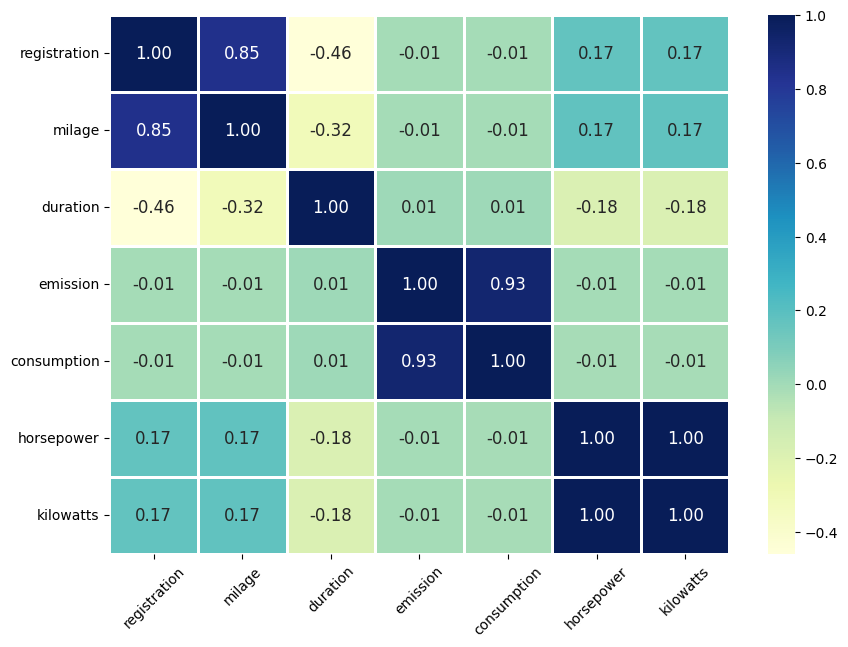

In [21]:
num_corr = num_FEATURES.corr()

# setting figure size
plt.figure(figsize=(10, 7))

# heatmap
sns.heatmap(num_corr, annot=True, linewidths=1.01, fmt=".2f", annot_kws={"size": 12}, linecolor='white', cmap="YlGnBu")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


#### 5.5.1 Dropping kilowatts <a id="drop-kilowatts"></a>

In [22]:
df = df.drop('kilowatts', axis = 1)
num_FEATURES = num_FEATURES.drop("kilowatts", axis=1)
FEATURE_names = FEATURE_names.drop("kilowatts")

---

## 6. Preprocessing and Feature Engineering <a id="preprocessing"></a>

### 6.1 Missing Values<a id="missing-values"></a>


In [23]:
missing_values = df.isnull().sum()

print("Summary of Missing Values:")
print(missing_values)

Summary of Missing Values:
registration      0
milage            0
duration          0
fee               0
emission        612
consumption     612
horsepower        0
brand             0
model             0
gear              0
fuel              0
dtype: int64


### 6.2 Cardinality of non-numeric features<a id="cardinality"></a>

In [24]:
unique_counts = cat_FEATURES.nunique()
print(unique_counts)

brand     20
model    346
gear       2
fuel       3
dtype: int64



### 6.3 Problems with splitting -- STILL OPEN <a id="splitting-problem"></a>


When splitting the dataset by using "train_test_split" we need to use stratification so that one-hot encoding works.
This creates the problem, that entries of the model column, that exist only once OR Twice can not be splitted using stratify. We have three possible approaches:
- drop once or twice appearing single entries of "model"
- duplicate or tripple once or twice appreaing entries of "model"
- create combined category for those models
- **use a custom splitting algorithm**

for now we desided to drop those entries -> Do other approach later!!!!

In [25]:
old_shape = df.shape[0]

In [26]:
few_instances_model = df.groupby("model").filter(lambda x: len(x) < 3)["model"].unique()
df=df[~df["model"].isin(few_instances_model)]
df.shape
print("Models dropped:", old_shape-df.shape[0])

Models dropped: 19


### 6.4 Out of Sample split <a id="osample-split"></a>

In [27]:
df_sample, df_osample = train_test_split(df, test_size=0.15, random_state=SEED, stratify=df[["model"]])

In [28]:
print("Size of the sample data:",df_sample.shape, "with a mean of: ",df_sample["fee"].mean(),
    "\nSize of out of sample data:",df_osample.shape, "with a mean of: ",df_osample["fee"].mean())

Size of the sample data: (16183, 11) with a mean of:  593.0066569857258 
Size of out of sample data: (2856, 11) with a mean of:  592.3941316526611


### 6.5 Train and Test slpit<a id="train-test-split"></a>

In [29]:
X_sample = df_sample.drop(TARGET_name,axis=1)
Y_sample = df_sample[TARGET_name]

X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.25, random_state=SEED, stratify=X_sample[["model"]])
print("Size of the train data:",X_train.shape,"with a mean fee of:",y_train.mean())
print("Size of the test data:",X_train.shape,"with a mean fee of:",y_test.mean())

Size of the train data: (12137, 10) with a mean fee of: 593.1457435939689
Size of the test data: (12137, 10) with a mean fee of: 592.5894315373208


### 6.6 Transformer Pipelines<a id="transformer-pipelines"></a>

In [30]:
numeric_features = num_FEATURES.columns
categorical_features = cat_FEATURES.columns

In [31]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='error', sparse_output=False, drop = 'first'))])

preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)    
    ])

preprocessor.fit(X_train)

cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
columns_pipeline = np.append(cat_columns, numeric_features)

## 7 Machine Learning Modeling<a id="machine-learning-modeling"></a>

### 7.1 Choosing appropriate metric & customization approach <a id="metric"></a>

For evaluation we chose a number of measurements:
- MSE: Mean-Square-Error
- RMSE: Root-Mean-Square-Error (for easier interpretation)
- R-squared (R²)
- Adjusted R-squared
- MAPE: Mean Absolute Percentage Error
- EVS: Explained variance score

#### Monitoring helper function

In [32]:
def monitor_system():
    while monitoring:
        cpu_usage = psutil.cpu_percent()
        memory_usage = psutil.virtual_memory()
        print(f"CPU usage: {cpu_usage}%")
        print(f"Memory usage: {memory_usage}%")

        time.sleep(10)  # Sleep

In [33]:
if comp_effort == "low":
    crossvals = 3
    iterations = 10
    cores = available_cores
elif comp_effort =="medium":
    crossvals = 5
    iterations = 20
    cores = available_cores-2
elif comp_effort == "high":
    crossvals = 5
    iterations = 30
    cores = available_cores-2
else:
    crossvals = 7
    iterations = 50
    cores = available_cores-2


def evaluate(model, X, Y):
    y_pred = model.predict(X)
    
    mse = mean_squared_error(Y, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(Y, y_pred)
    r2 = r2_score(Y, y_pred)
    evs = explained_variance_score(Y, y_pred)
    mapr = mean_absolute_percentage_error(Y, y_pred)

    metrics = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "EVS": evs,
        "MAPE": mapr
    }
    return (metrics)

# Scoring dictionary
scoring1 = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}
scoring2 = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}
scoring3 = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score),
    'MAPR': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}
scoring4 = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPR': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}
scoring = scoring4

### 7.2 Decision Tree <a id="decision-tree"></a>

In [34]:
# Define the parameter distribution
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    param_dist = {
        #'regressor__max_depth': randint(1, 10), # increasing depth always increases score -> overfitting
        'regressor__min_samples_split': [10, 20, 30, 40 ,50],
        'regressor__min_samples_leaf': [2, 4, 8, 10, 15, 20 ,30],
        'regressor__ccp_alpha': uniform(0, 0.05) # search for best ccp_alpha
    }

    # Create a new pipeline with the decision tree regression model
    decisionTree_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", DecisionTreeRegressor())
    ])

    # Perform randomized search with cross-validation
    decisionTree_randomized_search = RandomizedSearchCV(
        decisionTree_pipeline, 
        param_dist, 
        n_iter=iterations, 
        cv=crossvals, 
        scoring=scoring, 
        refit='MSE', 
        random_state=SEED, 
        n_jobs = cores,
        verbose = 3)
    decisionTree_randomized_search.fit(X_train, y_train)

    # evaluation metrics
    train_metrics = evaluate(decisionTree_randomized_search, X_train, y_train)
    test_metrics = evaluate(decisionTree_randomized_search, X_test, y_test)

    # create a dataframe from metrics
    decisionTree_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(decisionTree_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = decisionTree_randomized_search.best_params_

    decisionTree_params = pd.DataFrame({"Parameters": best_params})
    print(decisionTree_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")



CPU usage: 5.9%
Memory usage: svmem(total=34276040704, available=22122577920, percent=35.5, used=12153462784, free=22122577920)%
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Evaluation Metrics:
      Train Set   Test Set
MSE   47.846954  92.193196
RMSE   6.917149   9.601729
MAE    2.546763   3.199327
R2     0.999482   0.999006
EVS    0.999482   0.999008
MAPE   0.004965   0.006209
                              Parameters
regressor__ccp_alpha            0.046223
regressor__min_samples_leaf     2.000000
regressor__min_samples_split   20.000000
Computation time: 10.014163255691528


In [35]:
if compute:
    finalTree = DecisionTreeRegressor(
        ccp_alpha = best_params['regressor__ccp_alpha'],
        min_samples_leaf = best_params['regressor__min_samples_leaf'],
        min_samples_split = best_params['regressor__min_samples_split']
    )

    decisionTree_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalTree)
    ])
    decisionTree_final.fit(X_train, y_train)
else:
    decisionTree_final = load(f'{modelfolder}/DecisionTreeRegressor.joblib')

train_metrics = evaluate(decisionTree_final, X_train, y_train)
test_metrics = evaluate(decisionTree_final, X_test, y_test)

# create a dataframe from metrics
decisionTree_metrics = pd.DataFrame({'Decision Tree Train':train_metrics, 'Decision Tree Test': test_metrics})

print("\nEvaluation Metrics:")
print(decisionTree_metrics)


Evaluation Metrics:
      Decision Tree Train  Decision Tree Test
MSE             47.846954           92.090047
RMSE             6.917149            9.596356
MAE              2.546763            3.199086
R2               0.999482            0.999007
EVS              0.999482            0.999009
MAPE             0.004965            0.006206


### 7.3 Random Forest<a id="random-forest"></a>

In [36]:
monitoring = False
monitoring_thread.join()
end_time = time.time()  # Record the end time
computation_time = end_time - start_time

In [37]:
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    #param_dist = {
    #    'regressor__n_estimators': randint(20,50),
    #    # 'regressor__max_depth': randint(1,7),
    #    'regressor__min_samples_split': randint(2, 30),
    #    'regressor__min_samples_leaf': randint(1, 100)
    #}

    param_dist = {
        'regressor__n_estimators': [100, 300, 500, 1000],
        'regressor__max_depth': [8, 10, 12, 15, 20, 30, 50],
        'regressor__min_samples_split': [8, 10, 12, 15, 20, 30, 40, 50, 60],
        'regressor__min_samples_leaf': [4, 6, 8, 10, 15, 20, 30, 40, 50]
    }

    rf_randomized_search = RandomizedSearchCV(
        rf_pipeline, 
        param_distributions=param_dist, 
        n_iter = iterations/2, 
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        n_jobs = -1,
        verbose = 3)

    rf_randomized_search.fit(X_train, y_train)

    # evaluation metrics
    train_metrics = evaluate(rf_randomized_search, X_train, y_train)
    test_metrics = evaluate(rf_randomized_search, X_test, y_test)

    # create a dataframe from metrics
    randomForest_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(randomForest_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = rf_randomized_search.best_params_

    randomForest_params = pd.DataFrame({"Parameters": best_params})
    print(randomForest_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

CPU usage: 50.6%
Memory usage: svmem(total=34276040704, available=20431601664, percent=40.4, used=13844439040, free=20431601664)%
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU usage: 99.1%
Memory usage: svmem(total=34276040704, available=19460009984, percent=43.2, used=14816030720, free=19460009984)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=19429224448, percent=43.3, used=14846816256, free=19429224448)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=19384455168, percent=43.4, used=14891585536, free=19384455168)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=19360415744, percent=43.5, used=14915624960, free=19360415744)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=19299885056, percent=43.7, used=14976155648, free=19299885056)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=19481100288, percent=43.2, used=14794940416, free=19481100288)%
CPU usage: 100.0%
Memory

In [38]:
if compute:
    finalForest = RandomForestRegressor(
        n_estimators = best_params['regressor__n_estimators'],
        min_samples_split = best_params['regressor__min_samples_split'],
        min_samples_leaf = best_params['regressor__min_samples_leaf']
    )

    randomForest_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalForest)
    ])
    randomForest_final.fit(X_train, y_train)

else:
    randomForest_final = load(f'{modelfolder}/RandomForestRegressor.joblib')

train_metrics = evaluate(randomForest_final, X_train, y_train)
test_metrics = evaluate(randomForest_final, X_test, y_test)

# create a dataframe from metrics
randomForest_metrics = pd.DataFrame({'Random Forest Train':train_metrics, 'Random Forest Test': test_metrics})

print("\nEvaluation Metrics:")
print(randomForest_metrics)


Evaluation Metrics:
      Random Forest Train  Random Forest Test
MSE             76.499504          109.457757
RMSE             8.746400           10.462206
MAE              3.057785            3.745428
R2               0.999172            0.998820
EVS              0.999172            0.998821
MAPE             0.005457            0.006815


### 7.4 K-nearest neighbor <a id="k-neighbors"></a>

In [39]:
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    # Define the KNN pipeline
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ])

    # Define the parameter distribution for random search
    param_dist = {
        'regressor__n_neighbors': [10, 15, 20, 30, 35, 40, 50, 60, 70],
        'regressor__leaf_size': [20, 30, 40, 50, 60],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__p': [1]  # 1 for Manhattan distance, 2 for Euclidean distance
    }

    # Perform random search for hyperparameter tuning
    knn_randomized_search = RandomizedSearchCV(
        knn_pipeline,
        param_distributions=param_dist,
        n_iter=iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state = SEED,
        n_jobs = cores,
        verbose = 3
    )

    # Fit the KNN model to the training data
    knn_randomized_search.fit(X_train, y_train)

    # Evaluate the model performance
    train_metrics = evaluate(knn_randomized_search, X_train, y_train)
    test_metrics = evaluate(knn_randomized_search, X_test, y_test)

    # Create a dataframe from metrics
    knn_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(knn_metrics)

    # Get the best hyperparameter values and model performance
    best_params = knn_randomized_search.best_params_
    knn_params = pd.DataFrame({"Parameters": best_params})
    print(knn_params)

    print("\nEvaluation Metrics:")
    print(knn_metrics)
    
    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")

CPU usage: 8.7%
Memory usage: svmem(total=34276040704, available=19456950272, percent=43.2, used=14819090432, free=19456950272)%
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU usage: 96.6%
Memory usage: svmem(total=34276040704, available=19017572352, percent=44.5, used=15258468352, free=19017572352)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18676219904, percent=45.5, used=15599820800, free=18676219904)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18671357952, percent=45.5, used=15604682752, free=18671357952)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18744631296, percent=45.3, used=15531409408, free=18744631296)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18927804416, percent=44.8, used=15348236288, free=18927804416)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18829381632, percent=45.1, used=15446659072, free=18829381632)%
CPU usage: 100.0%
Memory

In [ ]:
if compute:
    finalKnn = KNeighborsRegressor(
        leaf_size = best_params['regressor__leaf_size'],#40
        n_neighbors = best_params['regressor__n_neighbors'], #10
        weights= best_params['regressor__weights'], #distance
        p = best_params['regressor__p'] #1
    )

    knn_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalKnn)
    ])

    knn_final.fit(X_train, y_train)

else:
    knn_final = load(f'{modelfolder}/KNeighborsRegressor.joblib')


train_metrics = evaluate(knn_final, X_train, y_train)
test_metrics = evaluate(knn_final, X_test, y_test)

# create a dataframe from metrics
knn_metrics = pd.DataFrame({'KNN Train':train_metrics, 'KNN Test': test_metrics})

print("\nEvaluation Metrics:")
print(knn_metrics)


Evaluation Metrics:
      KNN Train    KNN Test
MSE   11.755717  502.642432
RMSE   3.428661   22.419688
MAE    0.703240    9.642505
R2     0.999873    0.994581
EVS    0.999873    0.994586
MAPE   0.001378    0.017537


### 7.5 XGB <a id="xgb"></a>

In [ ]:

if compute:
    # Define the parameter distribution
    param_dist = {
        'regressor__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 50 ,60],
        'regressor__learning_rate': [0.001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'regressor__n_estimators': [100, 125, 150, 200, 225, 250, 300, 325, 350, 400, 450, 500],
        'regressor__gamma': [0.001,  0.01, 0.1, 0.2 , 0.3, 0.4, 0.50],
        'regressor__subsample': [0.5, 0.7, 0.8, 0.9],
        'regressor__colsample_bytree': [0.3, 0.5, 0.7, 0.8, 0.9],
    }

    # Create a new pipeline with the XGBoost regressor model
    xgb_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor())
    ])

    # Perform randomized search with cross-validation
    xgb_randomized_search = RandomizedSearchCV(
        xgb_pipeline,
        param_dist,
        n_iter=iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3)
        
    xgb_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics = evaluate(xgb_randomized_search, X_train, y_train)
    test_metrics = evaluate(xgb_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    xgb_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(xgb_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = xgb_randomized_search.best_params_
    xgb_params = pd.DataFrame({"Parameters": best_params})
    print(xgb_params)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
CPU usage: 83.0%
Memory usage: svmem(total=34276040704, available=18079932416, percent=47.3, used=16196108288, free=18079932416)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18027941888, percent=47.4, used=16248098816, free=18027941888)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=17948459008, percent=47.6, used=16327581696, free=17948459008)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=17880956928, percent=47.8, used=16395083776, free=17880956928)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18017873920, percent=47.4, used=16258166784, free=18017873920)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=18022240256, percent=47.4, used=16253800448, free=18022240256)%
CPU usage: 100.0%
Memory usage: svmem(total=34276040704, available=17863376896, percent=47.9, used=16412663808, free=17863376896)%
CPU usage: 100.0%
Memo

: 

In [ ]:
if compute:
    finalXGB = XGBRegressor(
        colsample_bytree = best_params['regressor__colsample_bytree'],
        gamma = best_params['regressor__gamma'],
        learning_rate = best_params['regressor__learning_rate'],
        max_depth = best_params['regressor__max_depth'],
        subsample = best_params['regressor__subsample']
    )

    xgb_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalXGB)
    ])
    xgb_final.fit(X_train, y_train)

else:
    xgb_final = load(f'{modelfolder}/XGBRegressor.joblib')

train_metrics = evaluate(xgb_final, X_train, y_train)
test_metrics = evaluate(xgb_final, X_test, y_test)

# Create a DataFrame from metrics
xgb_metrics = pd.DataFrame({'XGB Train': train_metrics, 'XGB Test': test_metrics})

print("\nEvaluation Metrics:")
print(xgb_metrics)


Evaluation Metrics:
      XGB Train   XGB Test
MSE   12.967564  83.684338
RMSE   3.601050   9.147914
MAE    1.109263   3.320201
R2     0.999860   0.999098
EVS    0.999860   0.999101
MAPE   0.002158   0.006516


### 7.6 Support-Vector-Machines (SVM) <a id="svm"></a>

In [ ]:
if compute:
    svm_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ])

    param_dist = {
        'regressor__C': [0.01, 0.1, 0.5, 1, 10, 100],
        'regressor__kernel': ['linear', 'rbf', 'poly'],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__epsilon': [0.1, 0.2, 0.3],
    }
    svm_randomized_search = RandomizedSearchCV(
        svm_pipeline,
        param_distributions=param_dist,
        n_iter=iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3
    )

    svm_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics = evaluate(svm_randomized_search, X_train, y_train)
    test_metrics = evaluate(svm_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    svm_rand_metrics = pd.DataFrame({'Train Set': train_metrics, 'Test Set': test_metrics})

    print("\nEvaluation Metrics:")
    print(svm_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = svm_randomized_search.best_params_
    svm_params = pd.DataFrame({"Parameters": best_params})
    print(svm_params)

In [ ]:
if compute:
    finalSVM = SVR(
        C=best_params['regressor__C'],
        kernel=best_params['regressor__kernel'],
        gamma=best_params['regressor__gamma'],
        epsilon=best_params['regressor__epsilon']
    )

    svm_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalSVM)
    ])
    svm_final.fit(X_train, y_train)

else:
    svm_final = load(f'{modelfolder}/SVR.joblib')

train_metrics = evaluate(svm_final, X_train, y_train)
test_metrics = evaluate(svm_final, X_test, y_test)

# Create a DataFrame from metrics
svm_metrics = pd.DataFrame({'SVM Train': train_metrics, 'SVM Test': test_metrics})

print("\nEvaluation Metrics:")
print(svm_metrics)



Evaluation Metrics:
        SVM Train     SVM Test
MSE   4049.370135  4187.185595
RMSE    63.634661    64.708466
MAE     22.095151    23.260872
R2       0.956188     0.954858
EVS      0.956637     0.955381
MAPE     0.033361     0.035704


## 8 Test Data Performance <a id="test-performance"></a>

### 8.1 Metrics comparison <a id="test-metrics-comparison"></a>

In [ ]:
metrics = [decisionTree_metrics, randomForest_metrics, knn_metrics, xgb_metrics, svm_metrics]

# Create empty DataFrames for train metrics and test metrics
train_metrics = pd.DataFrame()
test_metrics = pd.DataFrame()

# Loop through the metrics list and assign train and test metrics to respective DataFrames
for metric in metrics:
    for col in metric.columns:
        if "Train" in col:
            train_metrics = pd.concat([train_metrics, metric[[col]]], axis=1)
        elif "Test" in col:
            test_metrics = pd.concat([test_metrics, metric[[col]]], axis=1)

In [ ]:
def plotBars(metrics_input):
    #Define the evaluation metrics and their values
    metrics = metrics_input.index
    models = metrics_input.columns
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']

    # Set the figure size and create subplots
    fig, axs = plt.subplots(len(metrics) // 3, 3, figsize=(15, 6 * (len(metrics) // 3)))

    # Set the width of the bars
    bar_width = 0.25

    # Set the positions of the bars on the x-axis

    test_r = np.arange(len(models))
    # train_r = np.arange(len(models))
    # test_r = [x + bar_width/2 for x in r1]
    # Create a bar plot for each evaluation metric
    for i, metric in enumerate(metrics):
        test_values = None
        test_values = metrics_input.loc[metric].values


        # Check if values exist for all models
        if test_values.any() and len(test_values) == len(models):
            row = i // 3  # Determine the row index
            col = i % 3   # Determine the column index
            
            ax = axs[row, col]  # Get the corresponding subplot
            
            # Create a bar plot for each model with different color
            for j in range(len(test_values)):

                # ax.bar(train_r[j], train_values[j], width=bar_width, edgecolor='black', color=colors[j])
                ax.bar(test_r[j], test_values[j], width=bar_width, edgecolor='black', color=colors[j])
                
            
            # Set the labels, title, and ticks for the subplot
            ax.set_xlabel('Model')
            ax.set_ylabel(metric)
            ax.set_title(f'{metric} Comparison')
            ax.set_xticks(test_r)
            ax.set_xticklabels(models.str.strip(" Test"))

            # Adjust the spacing for long x-axis tick labels
            ax.set_xticks(test_r)
            ax.set_xticklabels(models.str.strip(" Test"), rotation=45, ha='right')
            plt.subplots_adjust(bottom=0.5)  # Increase the bottom margin if needed
            # Rotating the x-axis tick labels by 45 degrees for each subplot
            #ax.tick_params(axis='x', rotation=45)

            # Scale the y-axis to better visualize differences
            max_value = np.max(test_values)
            min_value = np.min(test_values)
            ax.set_ylim([min_value - 0.1 * abs(max_value), max_value + 0.1 * abs(max_value)])

            
        
    # Adjust the spacing between subplots
    plt.tight_layout()



    # Show the plot
    plt.show()

In [ ]:
train_metrics


Decision Tree Train  Random Forest Train  KNN Train  XGB Train   
MSE             79.107363            37.251613  11.791597  12.967564  \
RMSE             8.894232             6.103410   3.433889   3.601050   
MAE              3.189123             2.107848   0.702591   1.109263   
R2               0.999144             0.999597   0.999872   0.999860   
EVS              0.999144             0.999597   0.999872   0.999860   
MAPE             0.006018             0.003967   0.001377   0.002158   

        SVM Train  
MSE   4049.370135  
RMSE    63.634661  
MAE     22.095151  
R2       0.956188  
EVS      0.956637  
MAPE     0.033361

In [ ]:
test_metrics

Decision Tree Test  Random Forest Test    KNN Test   XGB Test   
MSE           101.186923           74.095298  428.254492  83.684338  \
RMSE           10.059171            8.607863   20.694311   9.147914   
MAE             3.682732            2.990922    8.237974   3.320201   
R2              0.998909            0.999201    0.995383   0.999098   
EVS             0.998910            0.999202    0.995386   0.999101   
MAPE            0.007046            0.005743    0.015046   0.006516   

         SVM Test  
MSE   4187.185595  
RMSE    64.708466  
MAE     23.260872  
R2       0.954858  
EVS      0.955381  
MAPE     0.035704

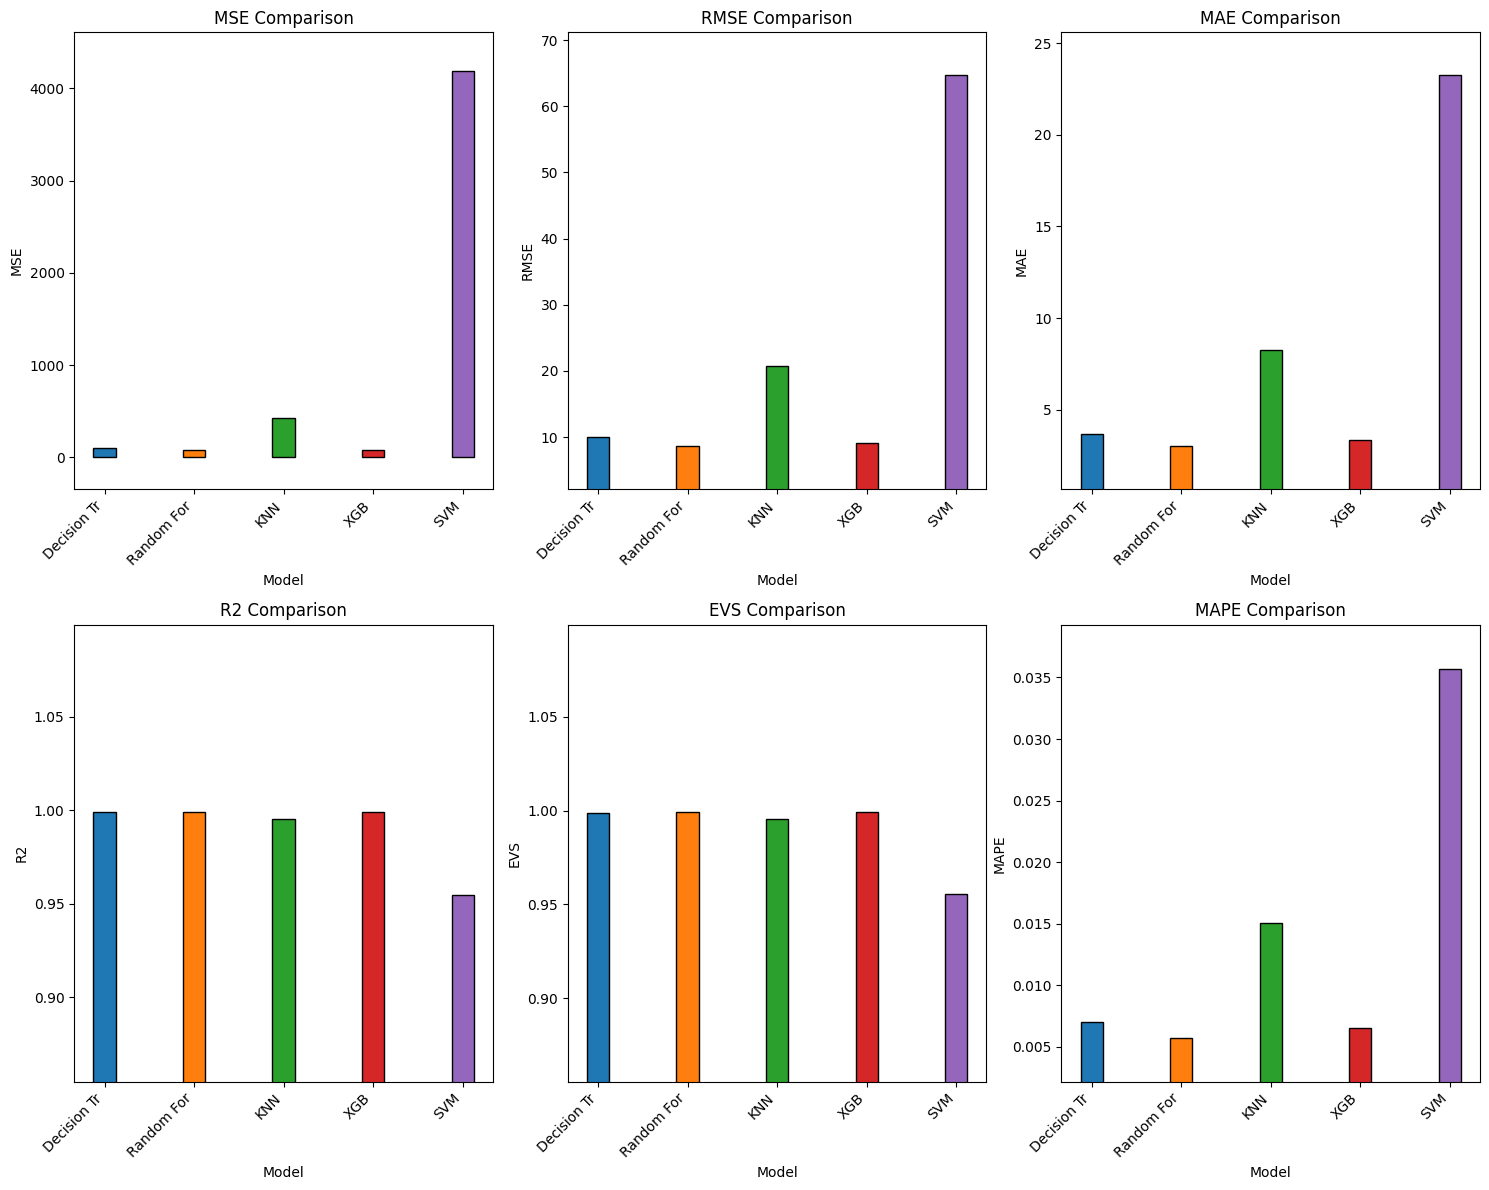

In [ ]:
plotBars(test_metrics)

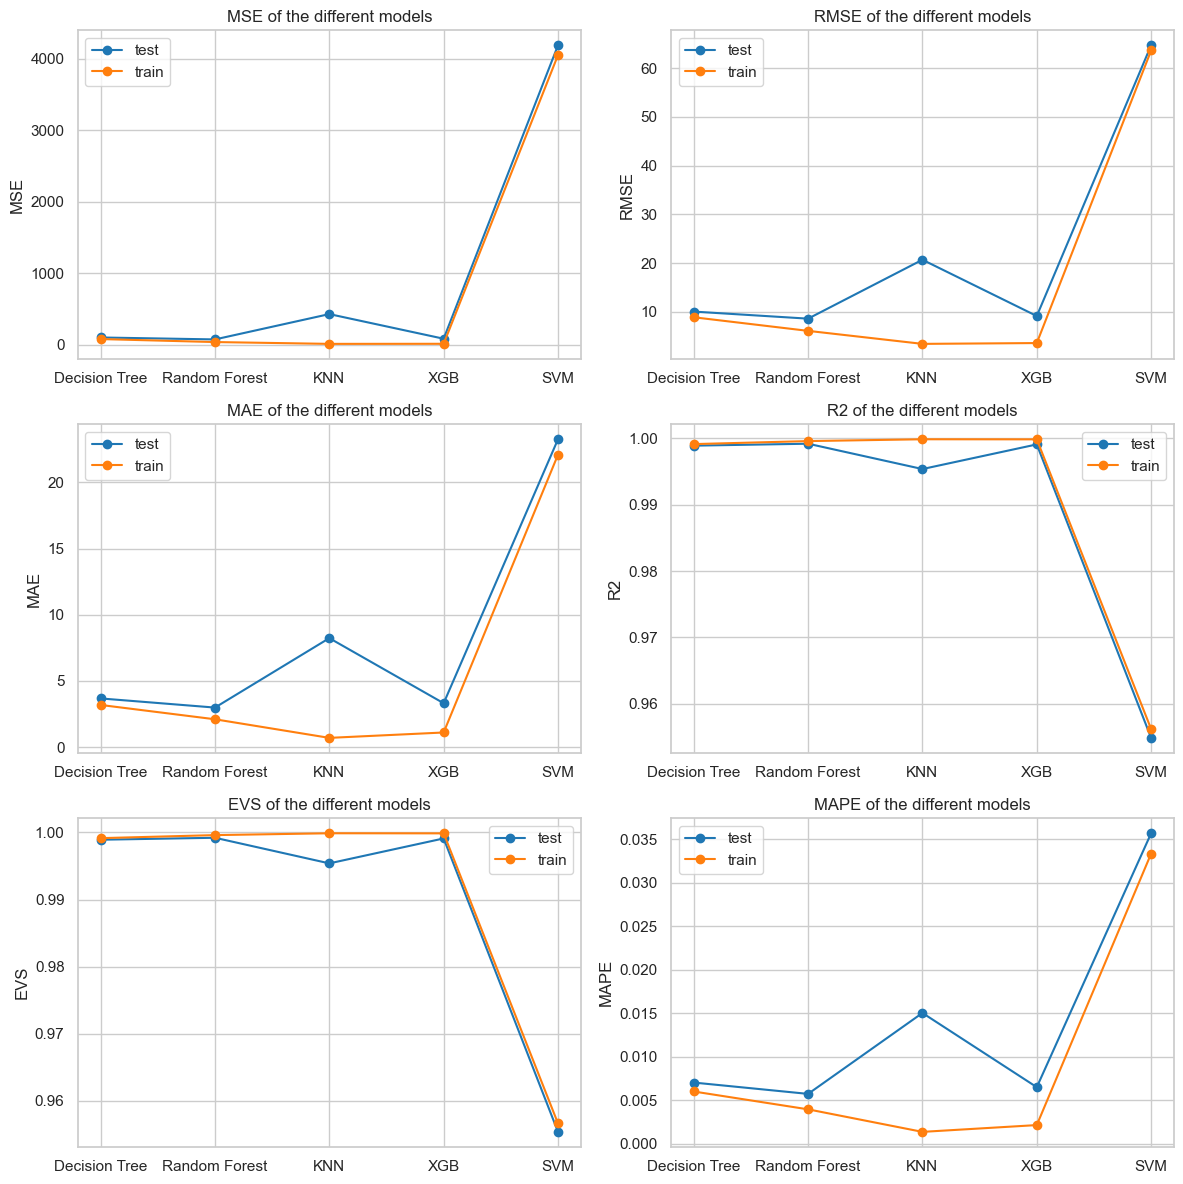

In [ ]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e']

# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = test_metrics.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(test_metrics.columns.str.replace(" Test",""), test_metrics.iloc[i], label="test", marker='o', color=colors[0])
    plt.plot(train_metrics.columns.str.replace(" Train",""), train_metrics.iloc[i], label="train", marker='o', color=colors[1])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### 8.2 Predicted vs actual plots <a id="test-predicted-actual"></a>
This is a scatter plot where the x-axis is the actual target values and the y-axis is the predicted values. If your model is perfectly accurate, all the points will lie along the line y = x (a 45-degree line). Deviations from this line indicate errors in prediction.

### 8.3 Histogram of residuals <a id="test-histograms"></a>
This plot can be used to check if the residuals are normally distributed, which is an assumption of many regression models. If the residuals are not normally distributed, it suggests that your model is not correctly capturing the data's patterns.

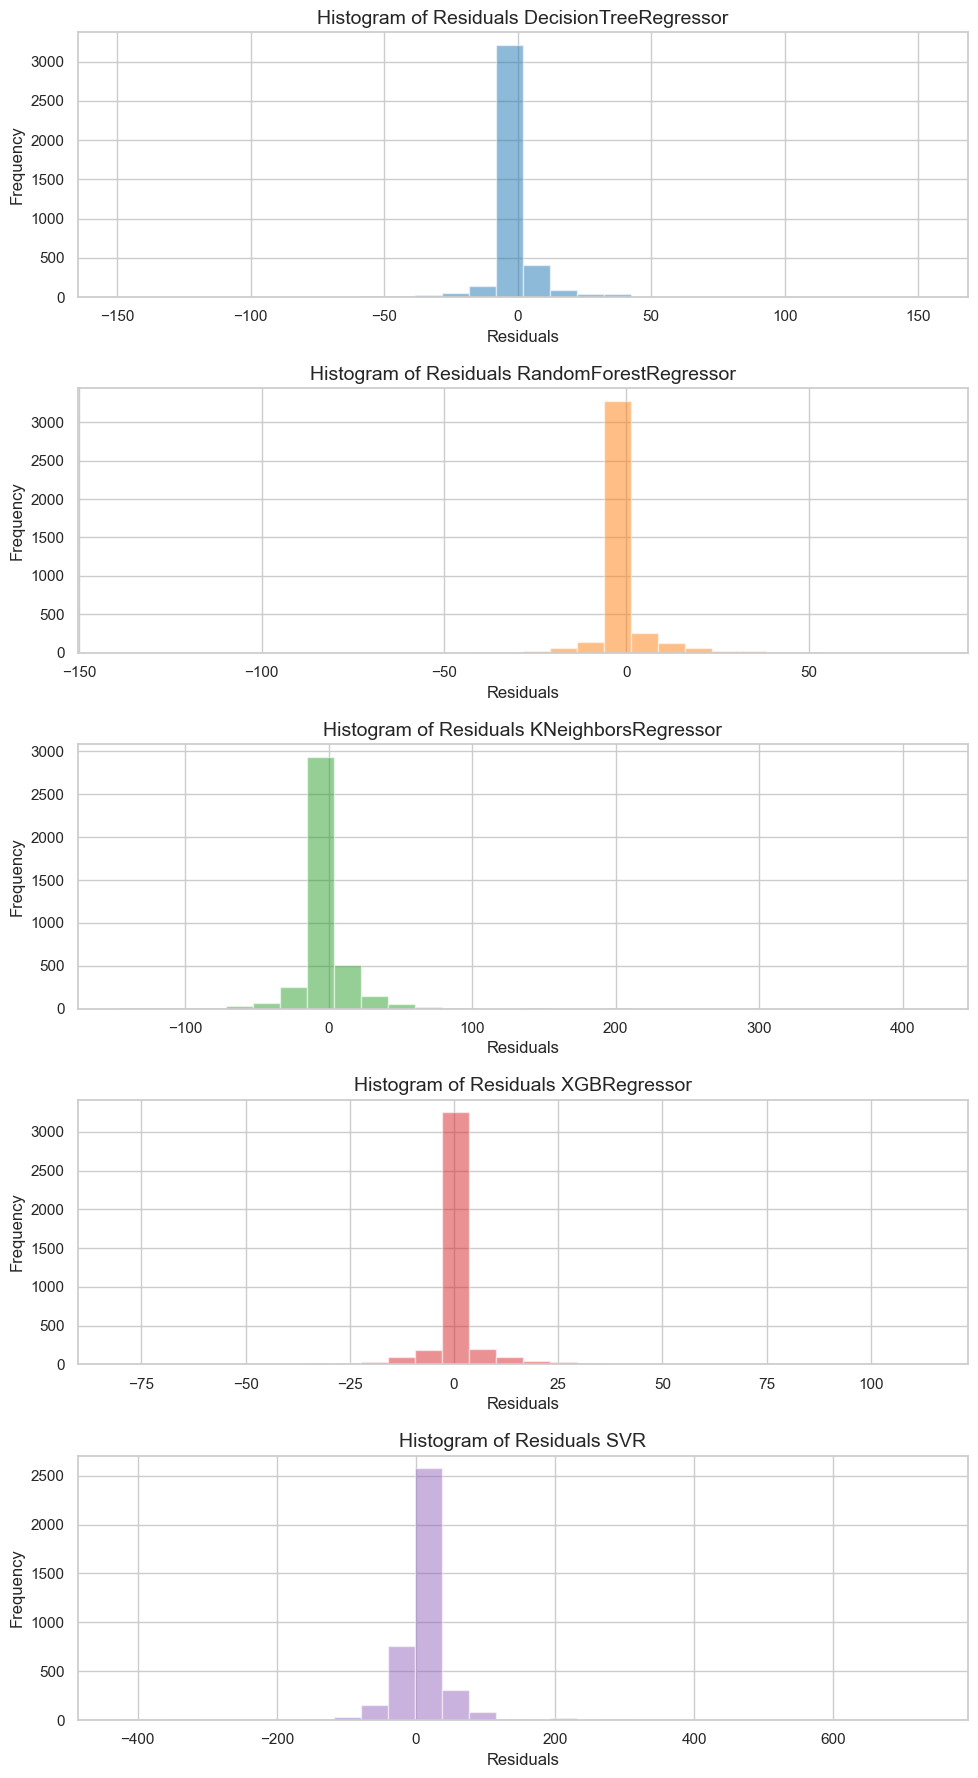

In [ ]:
def plotResiduals(models,X,y):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']
# Obtain the predictions of the models
    predictions =[]
    residuals=[]
    for model in models:
        #compute predictions
        prediction = model.predict(X)
        predictions.append(prediction)
        #append residuals
        residuals.append(y - prediction)

    fig, axs = plt.subplots(len(models), 1, figsize=(10, 18))

    for i,model in enumerate(models):
        axs[i].hist(residuals[i], bins=30, color=colors[i], alpha=0.5)
        axs[i].set_title(f'Histogram of Residuals {model.steps[-1][1].__class__.__name__}', fontsize=14)
        axs[i].set_xlabel('Residuals', fontsize=12)
        axs[i].set_ylabel('Frequency', fontsize=12)

    fig.tight_layout()
    plt.show()

models=[decisionTree_final, randomForest_final, knn_final, xgb_final, svm_final]

plotResiduals(models,X_test,y_test)

## 9 Out of sample performance <a id="osample-performance"></a>

### 9.1 Metrics comparison <a id="osample-metrics-comparison"></a>

In [ ]:
X_osample = df_osample.drop(TARGET_name,axis=1)
y_osample = df_osample[TARGET_name]

In [ ]:
a= pd.DataFrame({"asdf":evaluate(decisionTree_final, X_osample, y_osample)})

In [ ]:
test_metrics

Decision Tree Test  Random Forest Test    KNN Test   XGB Test   
MSE           101.186923           74.095298  428.254492  83.684338  \
RMSE           10.059171            8.607863   20.694311   9.147914   
MAE             3.682732            2.990922    8.237974   3.320201   
R2              0.998909            0.999201    0.995383   0.999098   
EVS             0.998910            0.999202    0.995386   0.999101   
MAPE            0.007046            0.005743    0.015046   0.006516   

         SVM Test  
MSE   4187.185595  
RMSE    64.708466  
MAE     23.260872  
R2       0.954858  
EVS      0.955381  
MAPE     0.035704

In [ ]:
def getMetrics(model,name, X,y):
    metrics = evaluate(model, X, y)
    metrics = pd.DataFrame({name:metrics})
    metrics = metrics.reindex(test_metrics.index)
    return(metrics)

decisionTree_osample_metrics = getMetrics(decisionTree_final, "Decision Tree out of sample", X_osample, y_osample)
randomForest_osample_metrics = getMetrics(randomForest_final, "Random Forest out of sample", X_osample, y_osample)
knn_osample_metrics = getMetrics(knn_final, "KNN out of sample", X_osample, y_osample)
xgb_osample_metrics = getMetrics(xgb_final,"XGB out of sample", X_osample, y_osample)
svm_osample_metrics = getMetrics(svm_final,"SVM out of sample", X_osample, y_osample)

In [ ]:
osample_metrics = pd.concat([decisionTree_osample_metrics,
                            randomForest_osample_metrics,
                            knn_osample_metrics,
                            xgb_osample_metrics,
                            svm_osample_metrics],
                            axis=1)

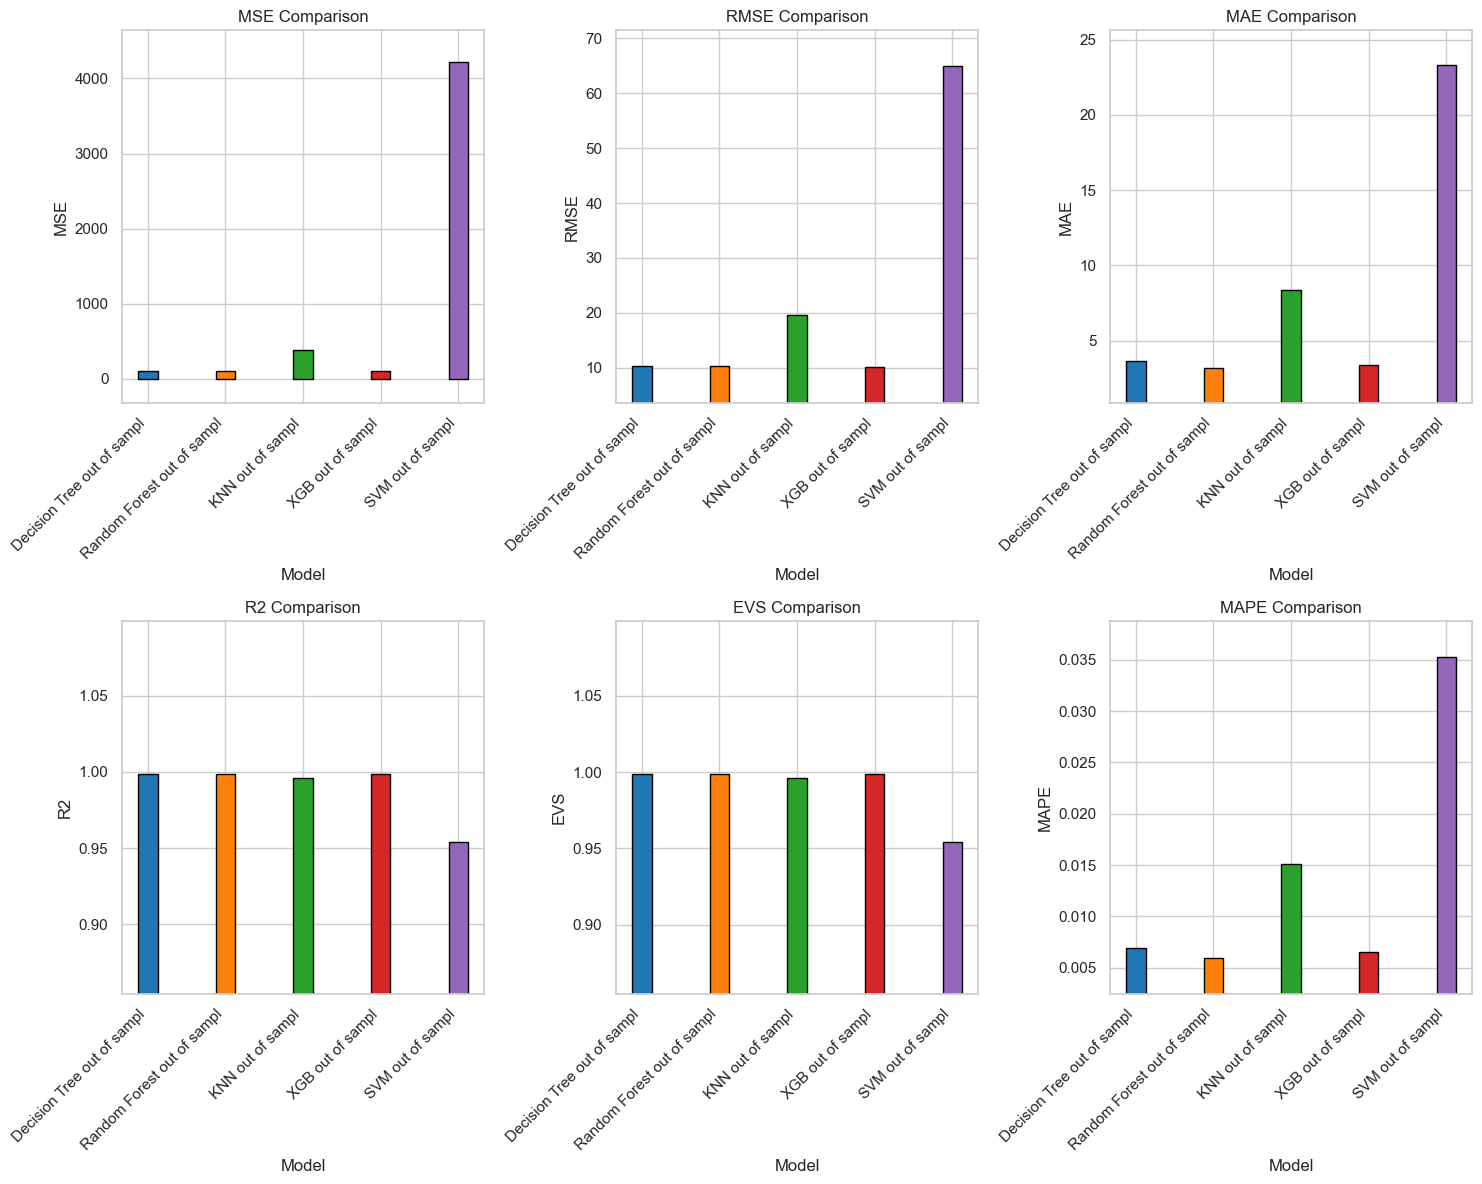

In [ ]:
plotBars(osample_metrics)

In [ ]:
test_metrics

Decision Tree Test  Random Forest Test    KNN Test   XGB Test   
MSE           101.186923           74.095298  428.254492  83.684338  \
RMSE           10.059171            8.607863   20.694311   9.147914   
MAE             3.682732            2.990922    8.237974   3.320201   
R2              0.998909            0.999201    0.995383   0.999098   
EVS             0.998910            0.999202    0.995386   0.999101   
MAPE            0.007046            0.005743    0.015046   0.006516   

         SVM Test  
MSE   4187.185595  
RMSE    64.708466  
MAE     23.260872  
R2       0.954858  
EVS      0.955381  
MAPE     0.035704

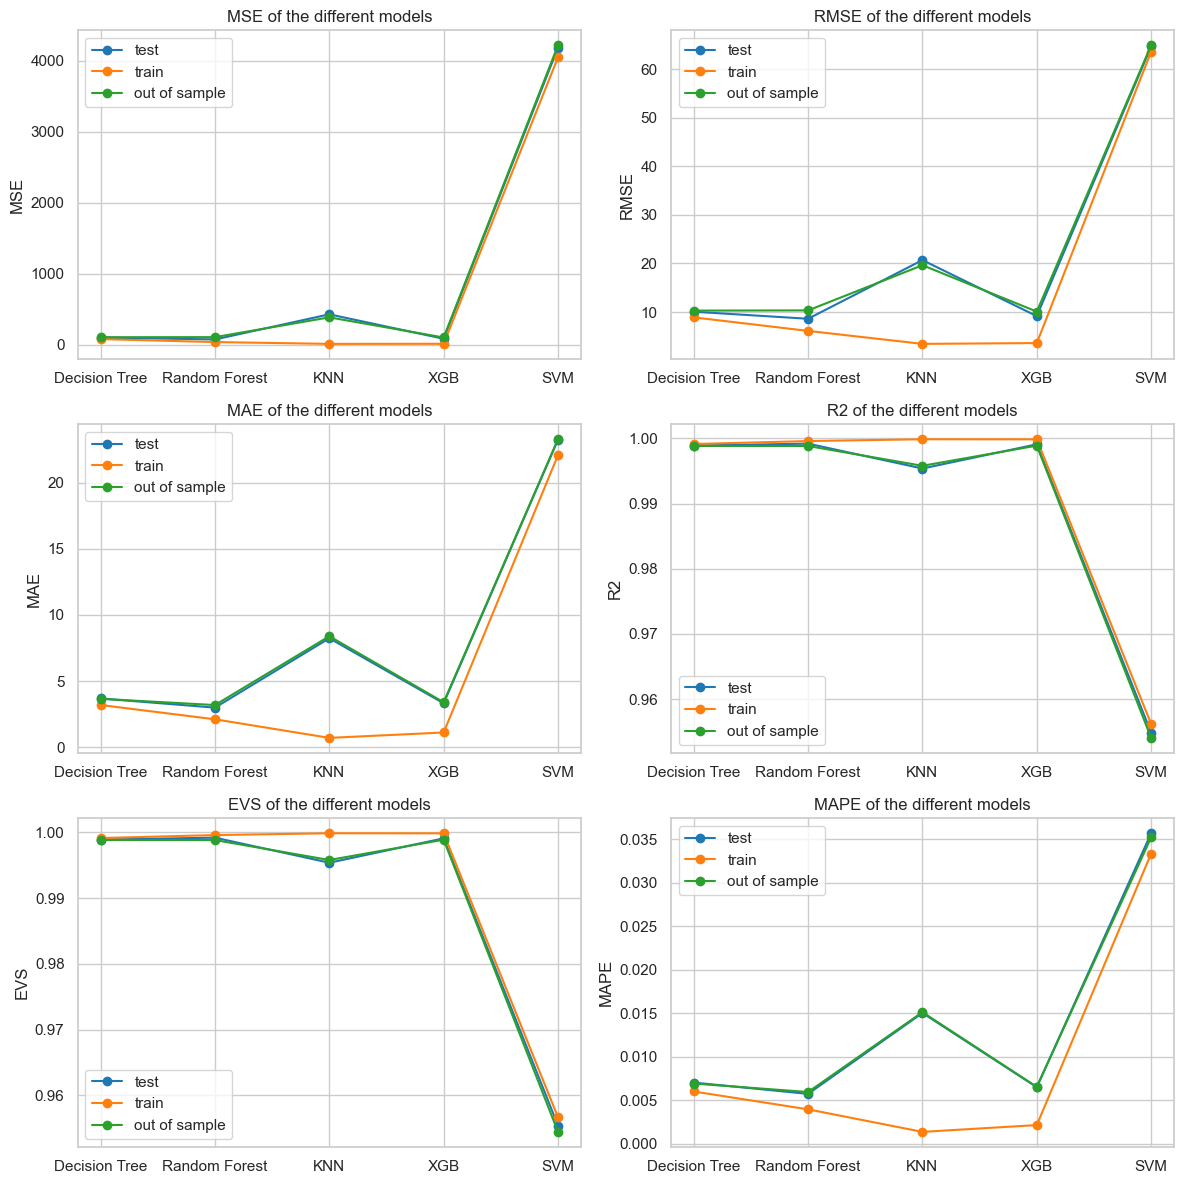

In [ ]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']
# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = test_metrics.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(test_metrics.columns.str.replace(" Test",""), test_metrics.iloc[i], label="test", marker='o', color=colors[0])
    plt.plot(train_metrics.columns.str.replace(" Train",""), train_metrics.iloc[i], label="train", marker='o', color=colors[1])
    plt.plot(osample_metrics.columns.str.replace(" out of sample",""), osample_metrics.iloc[i], label="out of sample", marker='o', color=colors[2])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### 9.2 Predicted vs actual plots <a id="osample-predicted-actual"></a>
This is a scatter plot where the x-axis is the actual target values and the y-axis is the predicted values. If your model is perfectly accurate, all the points will lie along the line y = x (a 45-degree line). Deviations from this line indicate errors in prediction.

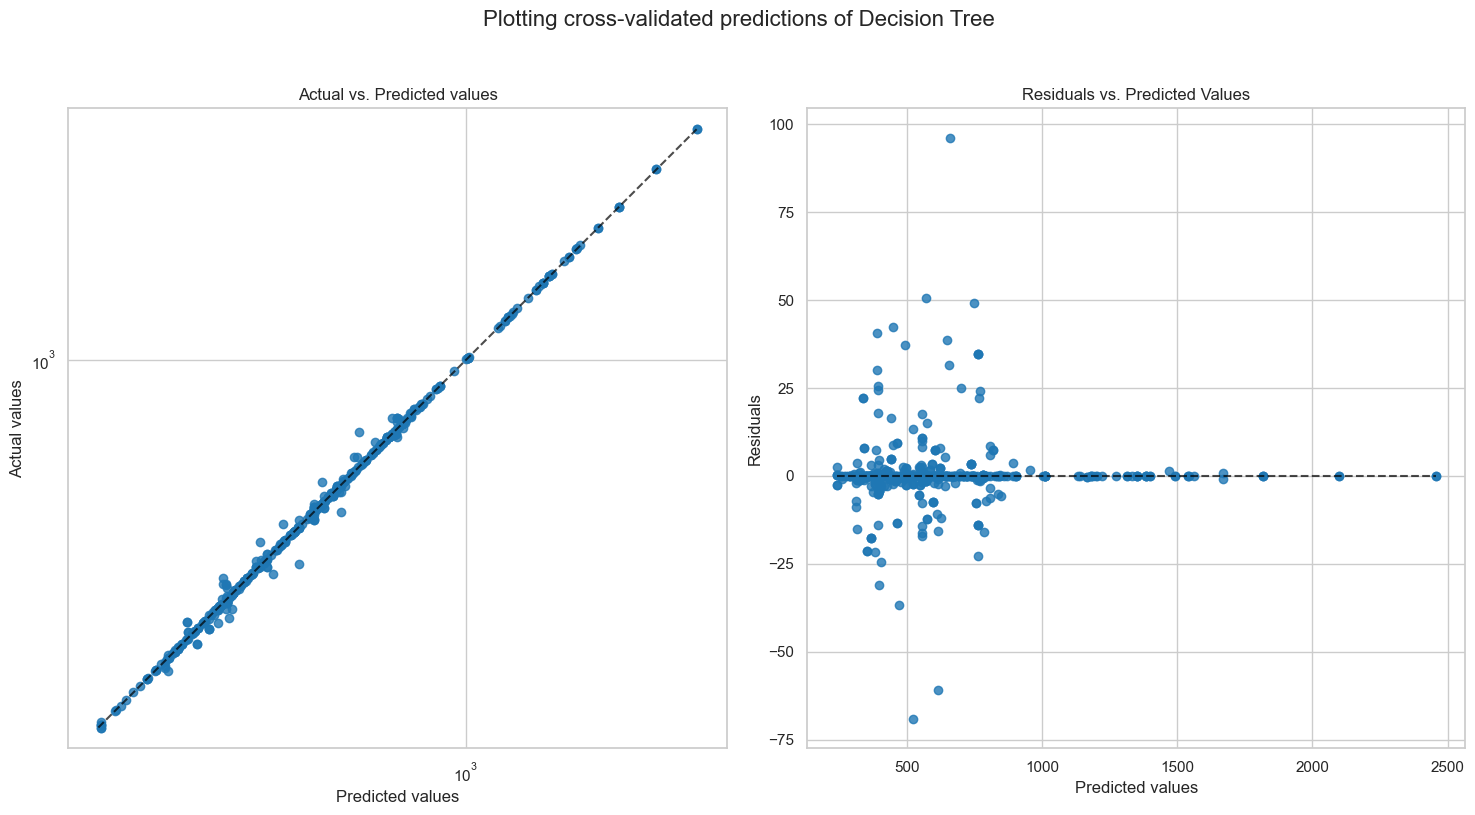

The mean residual of Decision Tree is: -0.13337499368690636


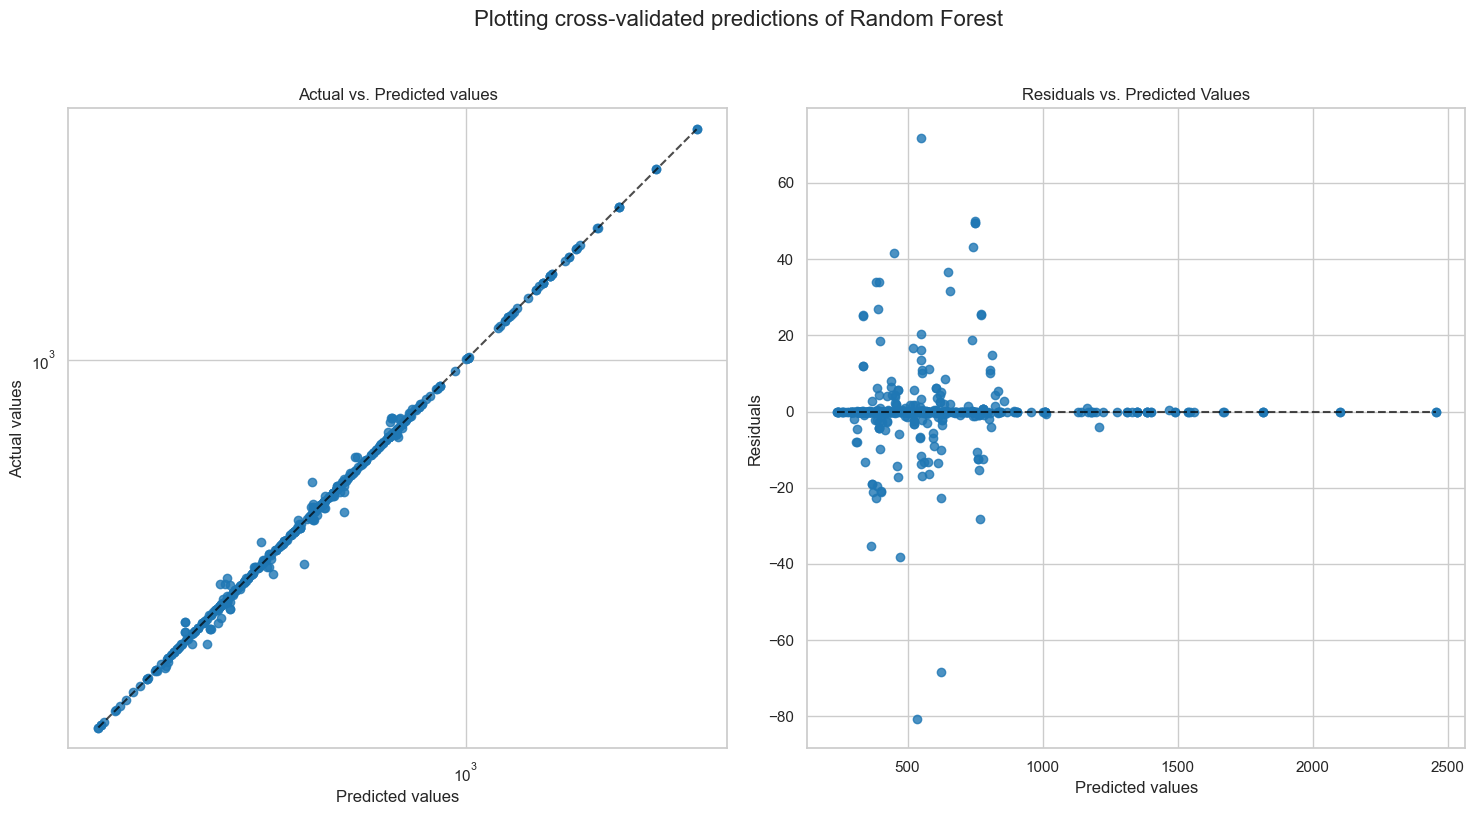

The mean residual of Random Forest is: -0.19127830240461902


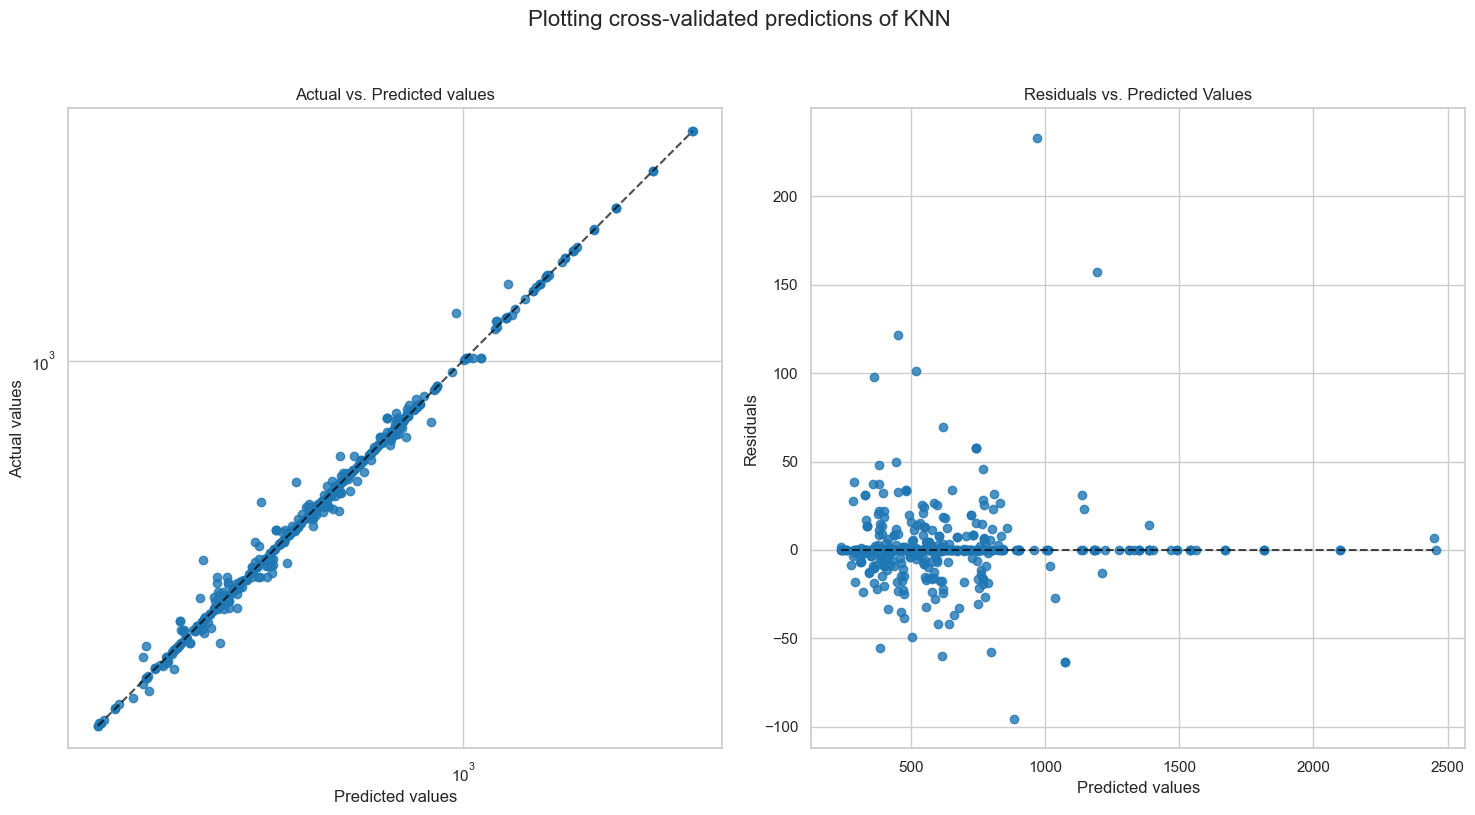

The mean residual of KNN is: -0.02357083677447351


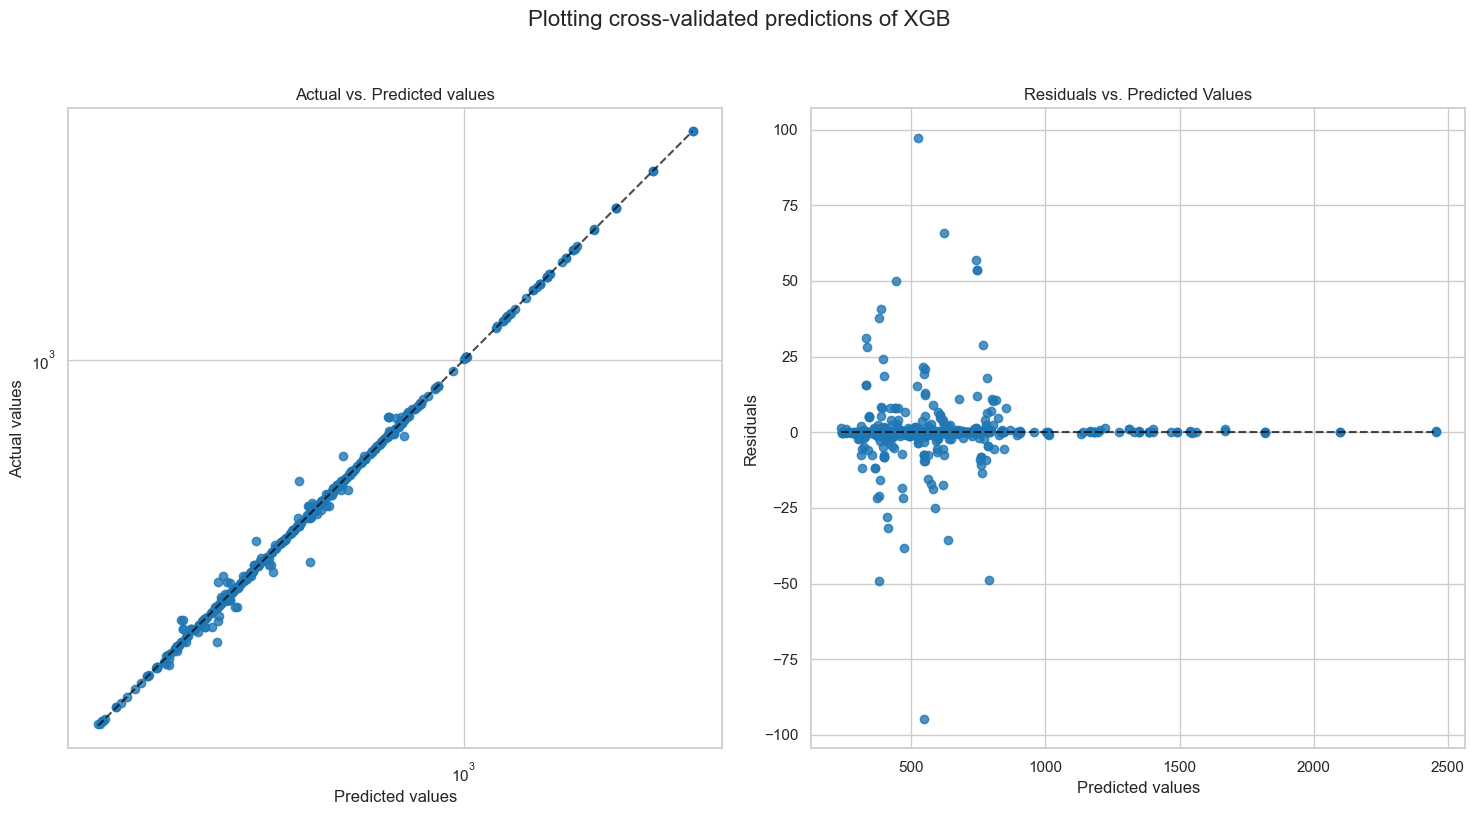

The mean residual of XGB is: 0.02394626542633804


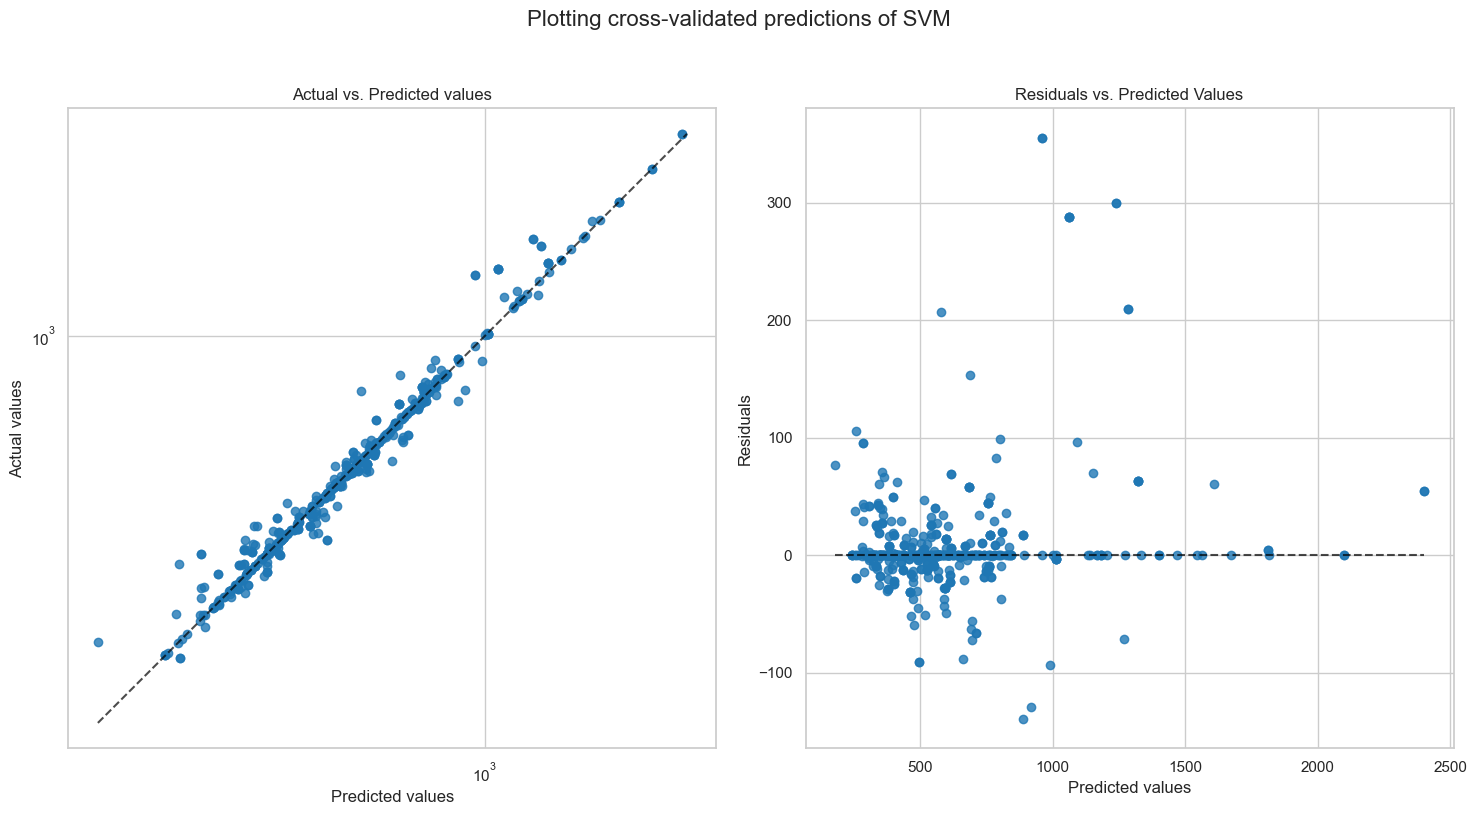

The mean residual of SVM is: 5.848141456100426


In [ ]:
plotPvA(decisionTree_final, "Decision Tree", X_osample, y_osample)
plotPvA(randomForest_final, "Random Forest", X_osample, y_osample)
plotPvA(knn_final, "KNN", X_osample, y_osample)
plotPvA(xgb_final, "XGB", X_osample, y_osample)
plotPvA(svm_final, "SVM", X_osample, y_osample)

### 9.3 Histogram of residuals <a id="osample-histograms"></a>
This plot can be used to check if the residuals are normally distributed, which is an assumption of many regression models. If the residuals are not normally distributed, it suggests that your model is not correctly capturing the data's patterns.

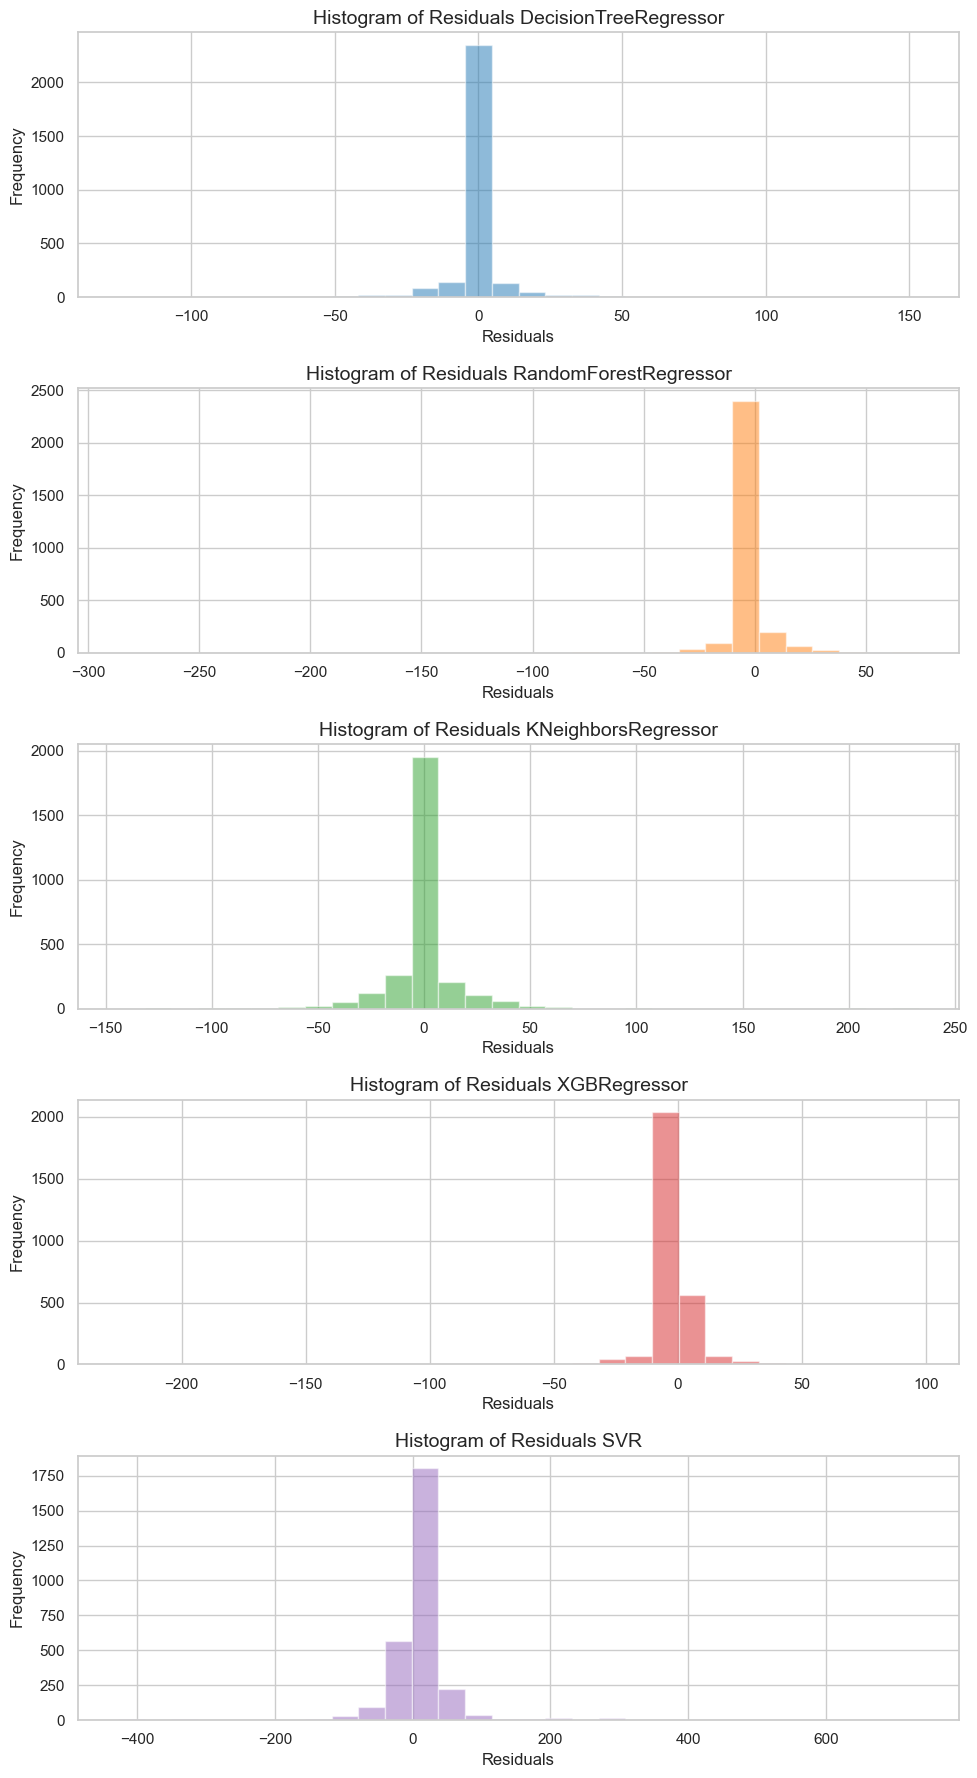

In [ ]:
plotResiduals(models, X_osample, y_osample)

## 10 Feature Importance Analysis  <a id="feature-importance"></a>

#### Helper functions

In [ ]:
def shapExplain(model):
    if model in [decisionTree_final, randomForest_final, xgb_final]:
        explainer = shap.TreeExplainer(decisionTree_final.named_steps["regressor"])
    elif model in [knn_final, svm_final]:
        explainer = shap.KernelExplainer(decisionTree_final.named_steps["regressor"])
    else:
        raise ValueError("Unsupported model type.")
    observations = model.named_steps["preprocessor"].transform(X_train)
    shap_values = explainer.shap_values(observations)
    shap.initjs()
    shap.summary_plot(shap_values, features=observations, feature_names=list(columns_pipeline), show = False)
    plt.show()
    return shap_values

In [ ]:
def importance(values):
    X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns_pipeline)
    shap_values_abs = np.abs(values)
    summary_df = pd.DataFrame([X_train_processed.columns, shap_values_abs.mean(axis=0)]).T
    summary_df.columns = ['Feature', 'mean_SHAP']
    summary_df['mean_SHAP'] = summary_df['mean_SHAP'].astype(float)
    mapping = pd.DataFrame(summary_df.groupby(summary_df['Feature'].str[0:5])['mean_SHAP'].mean()).reset_index() #!WICHTIG ANSCHAUEN: When you set str[0:10] or str[0:6], you are modifying the code to extract a different number of characters from the 'Feature' column. The resulting number of groups in the 'mapping' DataFrame will depend on the number of unique values obtained after extracting the specified characters 
    dic_to_replace = {'horse': "horsepower", 'brand': "brands",
                  'consu': 'consumption', 'model': 'model', 'milag': 'milage',
                  'regis': 'registration', 'durat': 'duration', 'fuel_': 'fuel_type', 'gear_':'gear_type', 'emiss': 'emission'}

    mapping = mapping.replace({"Feature": dic_to_replace})
    mapping = mapping.sort_values('mean_SHAP', ascending = False)
    mapping

    ## Adjust plot properly!
    height = mapping['mean_SHAP'].values
    bars = mapping['Feature'].to_list()
    y_pos = np.arange(len(bars))
    
    # Create horizontal bars
    plt.barh(y_pos, height, color=['dodgerblue'])
    
    # Create names on the x-axis
    plt.yticks(y_pos, bars)
    plt.xlabel('mean(|SHAP value|) (average impact on model output magnitude)', fontsize = 13, labelpad = 15)
    plt.grid(axis='both', alpha=.3)
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(1.0)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(1.0)
    plt.savefig('shap_values_mean.png', dpi = 100, bbox_inches='tight')
    plt.show()

### 10.1 Decision tree feature importance <a id="importance-decisiontree"></a>

This plot provides an overview of the feature importance by showing the distribution of SHAP values for each feature

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


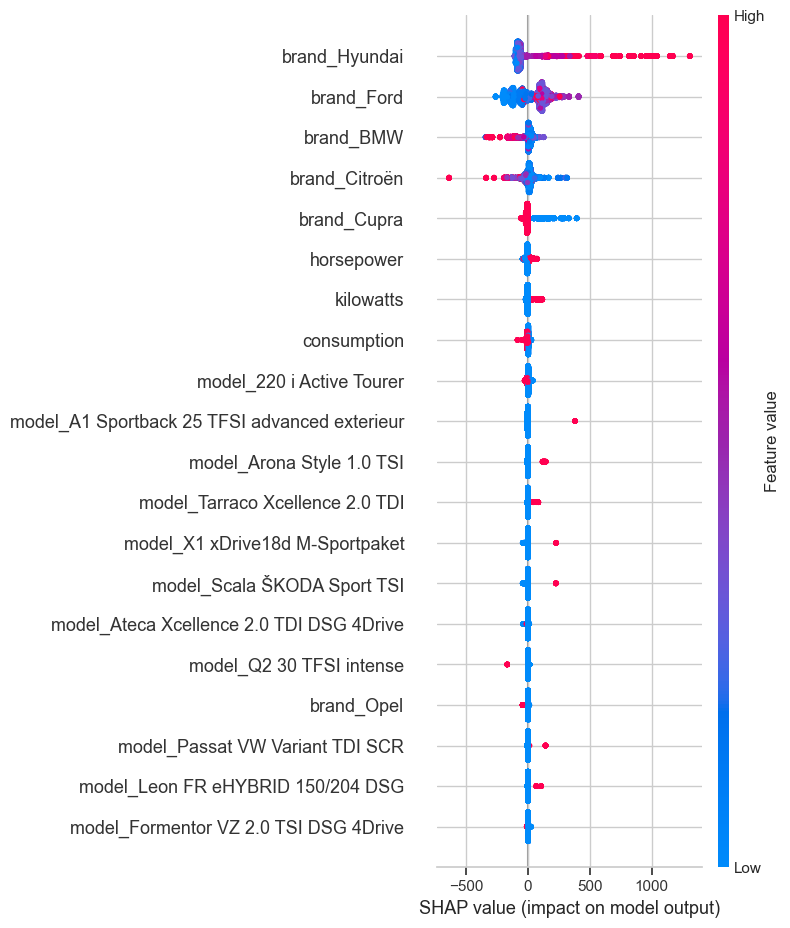

In [ ]:
shap_values_xgb = shapExplain(xgb_final)

#### Average importance of each variable

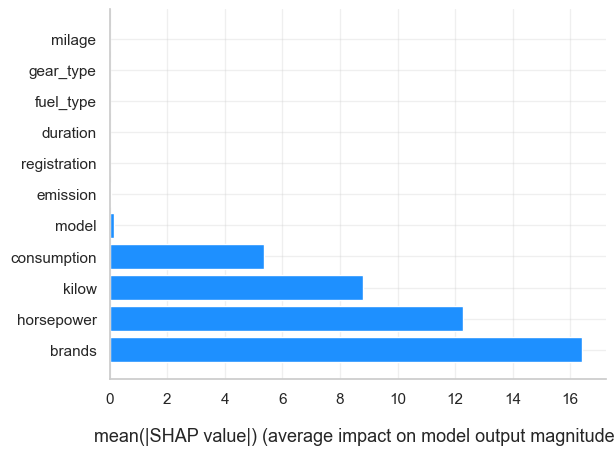

In [ ]:
importance(shap_values_xgb)

In [ ]:
#!pip install --upgrade numpy==1.23.5

### Random Forest

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


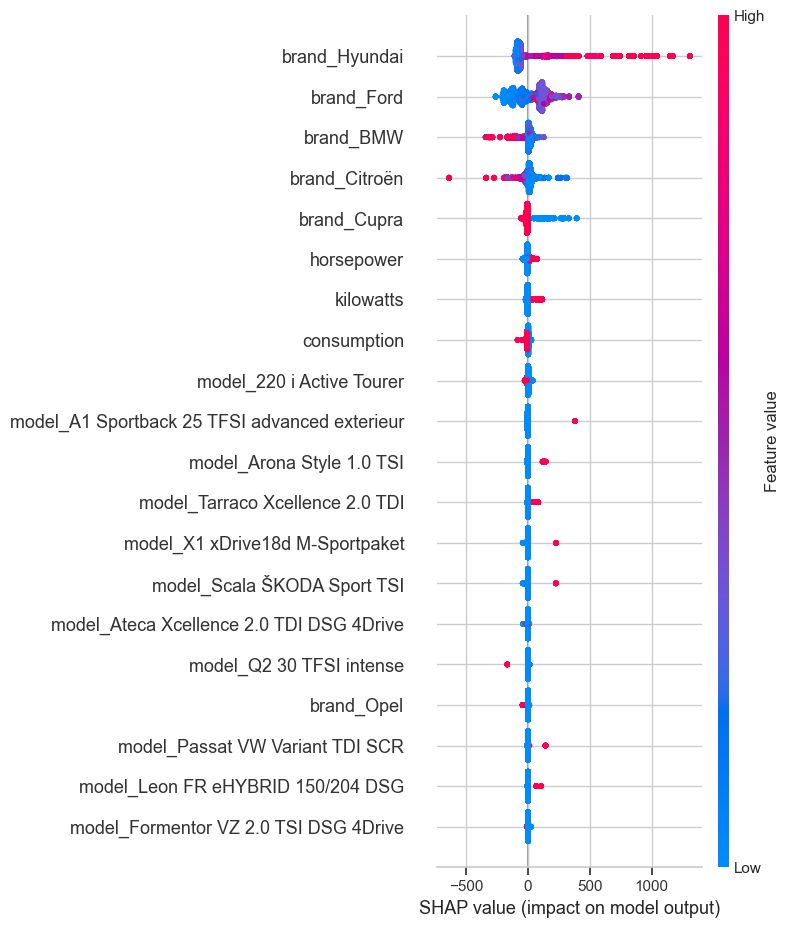

In [ ]:
shap_values_randomForest = shapExplain(randomForest_final)

#### Average importance of each variable

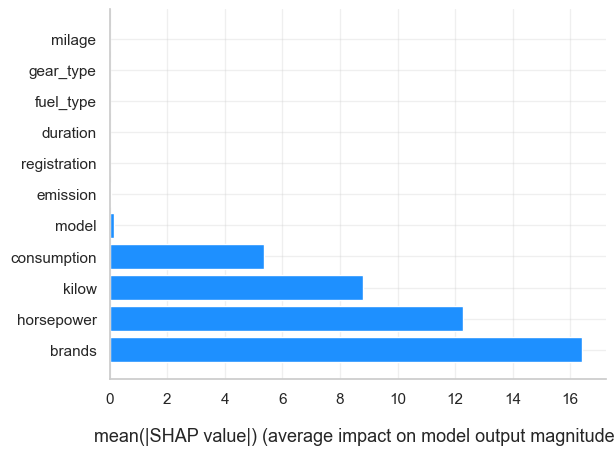

In [ ]:
importance(shap_values_randomForest)

## 11 Light models (reduced complexity)  <a id="light-models"></a>

In [ ]:
X_train_light = X_train.drop("model", axis=1)
X_test_light = X_test.drop("model", axis =1)
X_osample_light = X_osample.drop("model", axis = 1)
cat_FEATURES_light = cat_FEATURES.drop("model", axis=1)

In [ ]:
numeric_features = num_FEATURES.columns
categorical_features = cat_FEATURES_light.columns
preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)    
    ])

### 11.2 Best two performing full models  <a id="light-best"></a>

#### 11.2.1 Random Forest  <a id="light-forest"></a>

In [ ]:
compute = True
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    param_dist = {
        'regressor__n_estimators': [100, 300, 500, 700, 900, 1200, 1500, 2000],
        'regressor_max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'regressor__min_samples_split': [4, 6, 8, 10, 12, 15],
        'regressor__min_samples_leaf': [2, 4, 6, 8, 10]
    }

    rf_randomized_search = RandomizedSearchCV(
        rf_pipeline, 
        param_distributions=param_dist, 
        n_iter = iterations, 
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        n_jobs = cores,
        verbose = 3)

    rf_randomized_search.fit(X_train_light, y_train)

    # evaluation metrics
    train_metrics_light = evaluate(rf_randomized_search, X_train_light, y_train)
    test_metrics_light = evaluate(rf_randomized_search, X_test_light, y_test)

    # create a dataframe from metrics
    randomForest_rand_metrics = pd.DataFrame({'Train Set': train_metrics_light, 'Test Set': test_metrics_light})

    print("\nEvaluation Metrics:")
    print(randomForest_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = rf_randomized_search.best_params_

    randomForest_params = pd.DataFrame({"Parameters": best_params})
    print(randomForest_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")



Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\Users\Tobia\anaconda3\envs\py39\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\Tobia\anaconda3\envs\py39\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Tobia\AppData\Local\Temp\ipykernel_31404\75476065.py", line 5, in monitor_system
UnboundLocalError: local variable 'cpu_freq' referenced before assignment



Evaluation Metrics:
       Train Set    Test Set
MSE   343.008515  409.567500
RMSE   18.520489   20.237774
MAE     6.785606    7.826640
R2      0.996289    0.995584
EVS     0.996289    0.995586
MAPE    0.011879    0.014024
                              Parameters
regressor__min_samples_leaf            5
regressor__min_samples_split          12
regressor__n_estimators              300
Computation time: 271.02334904670715


In [ ]:
if compute:
    finalForest_light = RandomForestRegressor(
        n_estimators = best_params['regressor__n_estimators'],
        min_samples_split = best_params['regressor__min_samples_split'],
        min_samples_leaf = best_params['regressor__min_samples_leaf']
    )

    randomForest_light_final = Pipeline([
        ("preprocessor", preprocessor),
        # Decision tree regression model
        ("regressor", finalForest_light)
    ])
    randomForest_light_final.fit(X_train_light, y_train)

else:
    randomForest_light_final = load(f'{modelfolder}/RandomForestRegressor.joblib')

train_metrics_light = evaluate(randomForest_light_final, X_train_light, y_train)
test_metrics_light = evaluate(randomForest_light_final, X_test_light, y_test)

# create a dataframe from metrics
randomForest_light_metrics = pd.DataFrame({'Random Forest Train':train_metrics_light, 'Random Forest Test': test_metrics_light})

print("\nEvaluation Metrics:")
print(randomForest_light_metrics)


Evaluation Metrics:
      Random Forest Train  Random Forest Test
MSE            340.212102          412.661687
RMSE            18.444839           20.314076
MAE              6.737971            7.795898
R2               0.996319            0.995551
EVS              0.996319            0.995553
MAPE             0.011804            0.013973


#### 11.2.2 XGB <a id="light-xgb"></a>

In [ ]:
if compute:
    monitoring = True
    start_time = time.time()
    monitoring_thread = threading.Thread(target=monitor_system)
    monitoring_thread.start()
    
    # Define the parameter distribution
    param_dist = {
        'regressor__max_depth': randint(3, 200),
        'regressor__learning_rate': [0.001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        'regressor__n_estimators': randint(100, 500),
        'regressor__gamma': [0.001,  0.01, 0.1, 0.2 , 0.3, 0.4, 0.50],
        'regressor__subsample': [0.5, 0.7, 0.8, 0.9],
        'regressor__colsample_bytree': [0.3, 0.5, 0.7, 0.8, 0.9],
    }

    # Create a new pipeline with the XGBoost regressor model
    xgb_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor())
    ])

    # Perform randomized search with cross-validation
    xgb_randomized_search = RandomizedSearchCV(
        xgb_pipeline,
        param_dist,
        n_iter=iterations,
        cv=crossvals,
        scoring=scoring,
        refit='MSE',
        return_train_score=True,
        random_state=SEED,
        error_score="raise",
        n_jobs=cores,
        verbose = 3)
        
    xgb_randomized_search.fit(X_train, y_train)

    # Evaluation metrics
    train_metrics_light = evaluate(xgb_randomized_search, X_train, y_train)
    test_metrics_light = evaluate(xgb_randomized_search, X_test, y_test)

    # Create a DataFrame from metrics
    xgb_rand_metrics = pd.DataFrame({'Train Set': train_metrics_light, 'Test Set': test_metrics_light})

    print("\nEvaluation Metrics:")
    print(xgb_rand_metrics)

    # Get the best hyperparameter values and model performance
    best_params = xgb_randomized_search.best_params_
    xgb_params = pd.DataFrame({"Parameters": best_params})
    print(xgb_params)

    monitoring = False
    monitoring_thread.join()
    end_time = time.time()  # Record the end time
    computation_time = end_time - start_time
    print(f"Computation time: {computation_time}")


Evaluation Metrics:
       Train Set    Test Set
MSE   120.748412  388.951753
RMSE   10.988558   19.721860
MAE     5.068947    8.440064
R2      0.998694    0.995807
EVS     0.998749    0.995887
MAPE    0.008829    0.015265
                             Parameters
regressor__colsample_bytree        0.70
regressor__gamma                   0.01
regressor__learning_rate           0.05
regressor__max_depth              88.00
regressor__n_estimators          114.00
regressor__subsample               0.90


In [ ]:
if compute:
    finalXGB_light = XGBRegressor(
        colsample_bytree = best_params['regressor__colsample_bytree'],
        gamma = best_params['regressor__gamma'],
        learning_rate = best_params['regressor__learning_rate'],
        max_depth = best_params['regressor__max_depth'],
        subsample = best_params['regressor__subsample']
    )

    xgb_light_final = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", finalXGB_light)
    ])
    xgb_light_final.fit(X_train, y_train)

else:
    xgb_light_final = load(f'{modelfolder}/XGBRegressor.joblib')

train_metrics_light = evaluate(xgb_light_final, X_train, y_train)
test_metrics_light = evaluate(xgb_light_final, X_test, y_test)

# Create a DataFrame from metrics
xgb_light_metrics = pd.DataFrame({'XGB Train': train_metrics_light, 'XGB Test': test_metrics_light})

print("\nEvaluation Metrics:")
print(xgb_light_metrics)


Evaluation Metrics:
       XGB Train    XGB Test
MSE   160.841202  399.943181
RMSE   12.682318   19.998579
MAE     7.005212    9.793077
R2      0.998260    0.995688
EVS     0.998458    0.995929
MAPE    0.011854    0.017200


### 11.3 Performance full vs light models  <a id="light-comparison"></a>

In [ ]:
randomForest_light_osample_metrics = getMetrics(randomForest_light_final, "Random Forest out of sample", X_osample, y_osample)
xgb_light_osample_metrics = getMetrics(xgb_light_final,"XGB out of sample", X_osample, y_osample)

In [ ]:
metrics = [randomForest_light_metrics, xgb_light_metrics]

# Create empty DataFrames for train metrics and test metrics
train_metrics_light = pd.DataFrame()
test_metrics_light = pd.DataFrame()

# Loop through the metrics list and assign train and test metrics to respective DataFrames
for metric in metrics:
    for col in metric.columns:
        if "Train" in col:
            train_metrics_light = pd.concat([train_metrics_light, metric[[col]]], axis=1)
        elif "Test" in col:
            test_metrics_light = pd.concat([test_metrics_light, metric[[col]]], axis=1)

In [ ]:
osample_metrics_light = pd.concat([randomForest_light_osample_metrics,
                            xgb_light_osample_metrics],
                            axis=1)

In [ ]:
osample_metrics_light

Random Forest out of sample  XGB out of sample
MSE                   5863.632706         435.490653
RMSE                    76.574361          20.868413
MAE                     46.094313          10.369257
R2                       0.936142           0.995257
EVS                      0.936160           0.995452
MAPE                     0.073741           0.017963

In [ ]:
osample_metrics[osample_metrics_light.columns]

Random Forest out of sample  XGB out of sample
MSE                    106.692017         101.620353
RMSE                    10.329183          10.080692
MAE                      3.185587           3.395268
R2                       0.998838           0.998893
EVS                      0.998838           0.998893
MAPE                     0.005956           0.006550

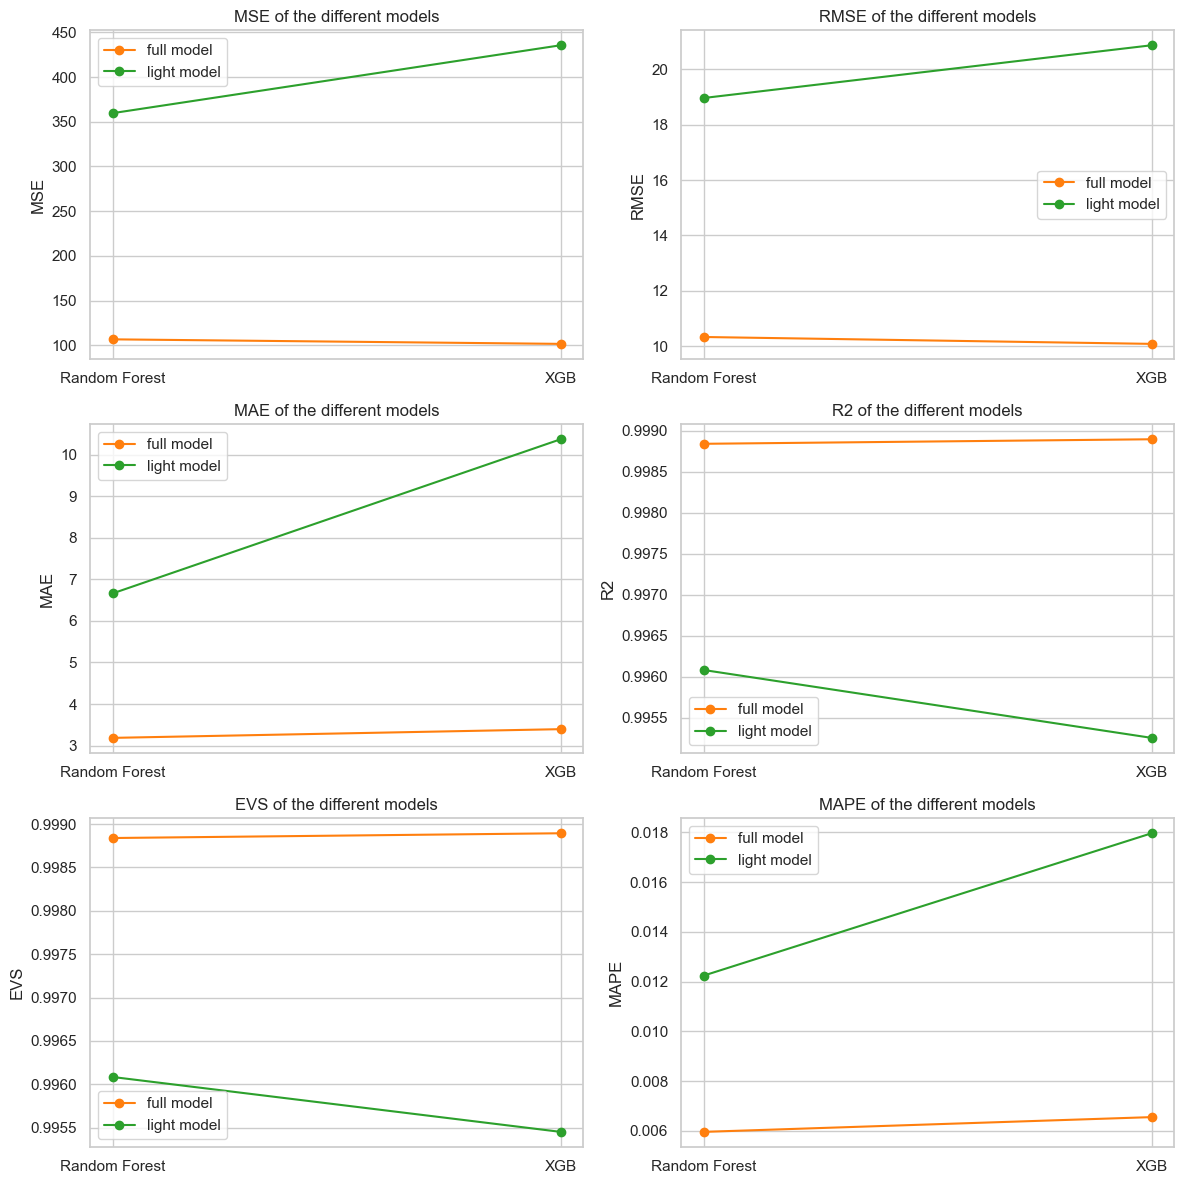

In [ ]:
# Set the style and color palette of the plot
sns.set(style='whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728','#9467bd', '#8c564b']

# Set the figure size
plt.figure(figsize=(12, 12))

# Plot the evaluation metrics
metrics = osample_metrics_light.index
metrics1 = ['MSE', 'RMSE', 'MAE', 'R2', 'EVS', 'MAPE']

for i in range(len(metrics)):
    plt.subplot(3, 2, i+1)
    plt.plot(osample_metrics[osample_metrics_light.columns].columns.str.replace(" out of sample",""), osample_metrics[osample_metrics_light.columns].iloc[i], label="full model", marker='o', color=colors[1])
    plt.plot(osample_metrics_light.columns.str.replace(" out of sample",""), osample_metrics_light.iloc[i], label="light model", marker='o', color=colors[2])

    # Set the y-axis label
    plt.ylabel(metrics[i])
    
    # Set the title of the plot
    title =metrics[i]
    plt.title(title+ " of the different models")
    
    # Set the legend
    plt.legend()


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


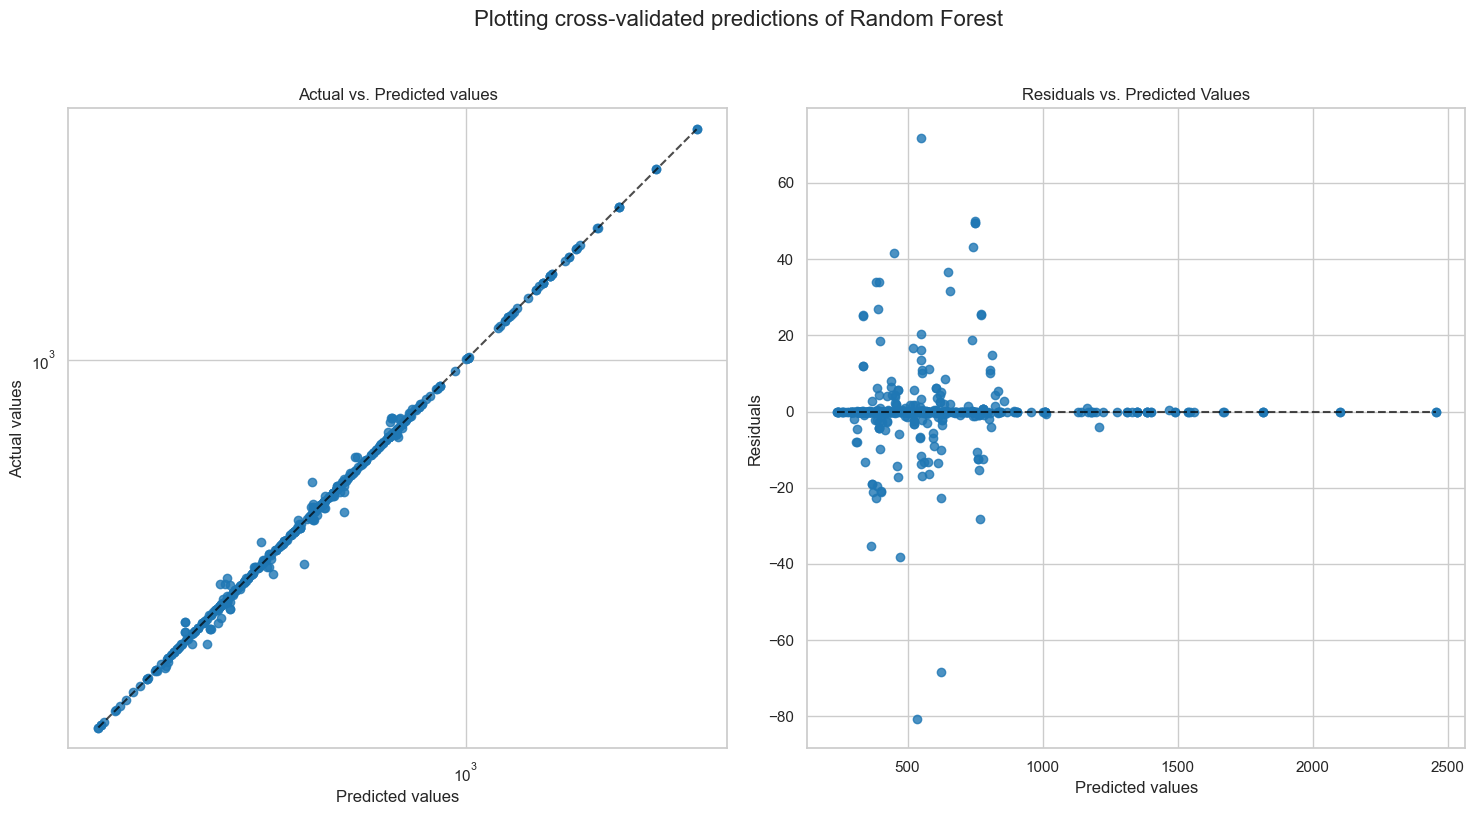

The mean residual of Random Forest is: -0.19127830240461902


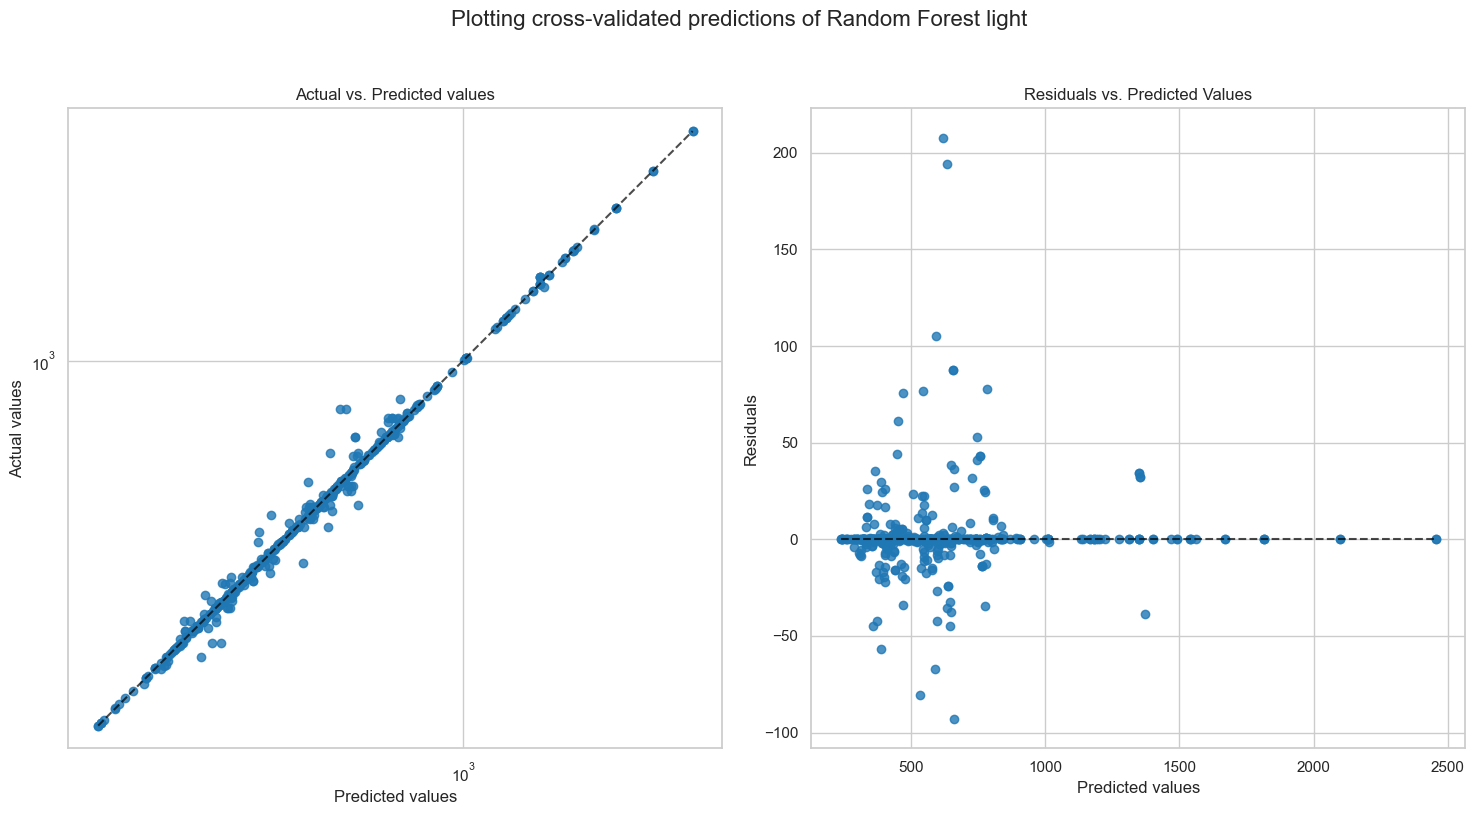

The mean residual of Random Forest light is: -0.2995053912333929


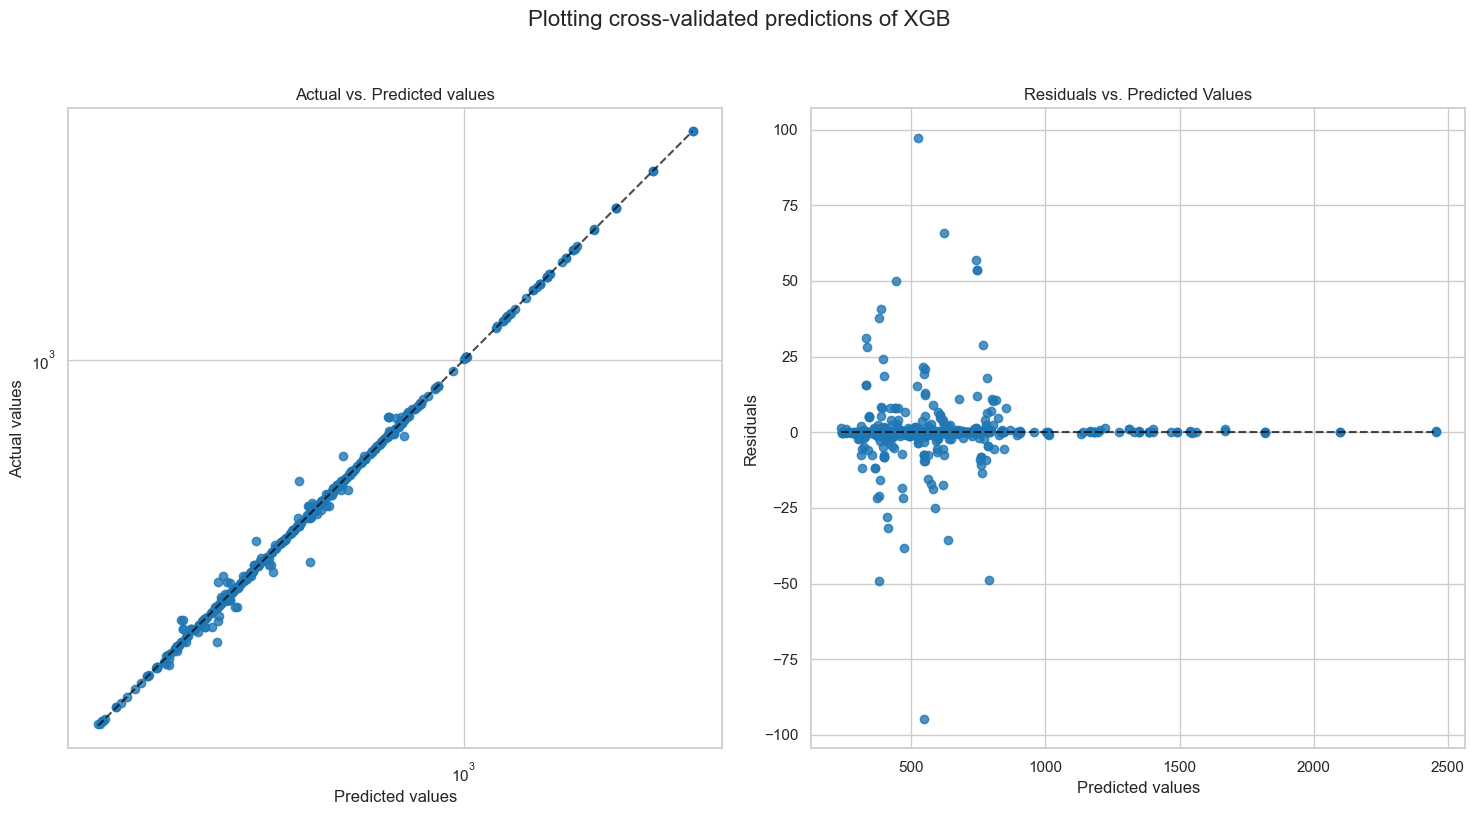

The mean residual of XGB is: 0.02394626542633804


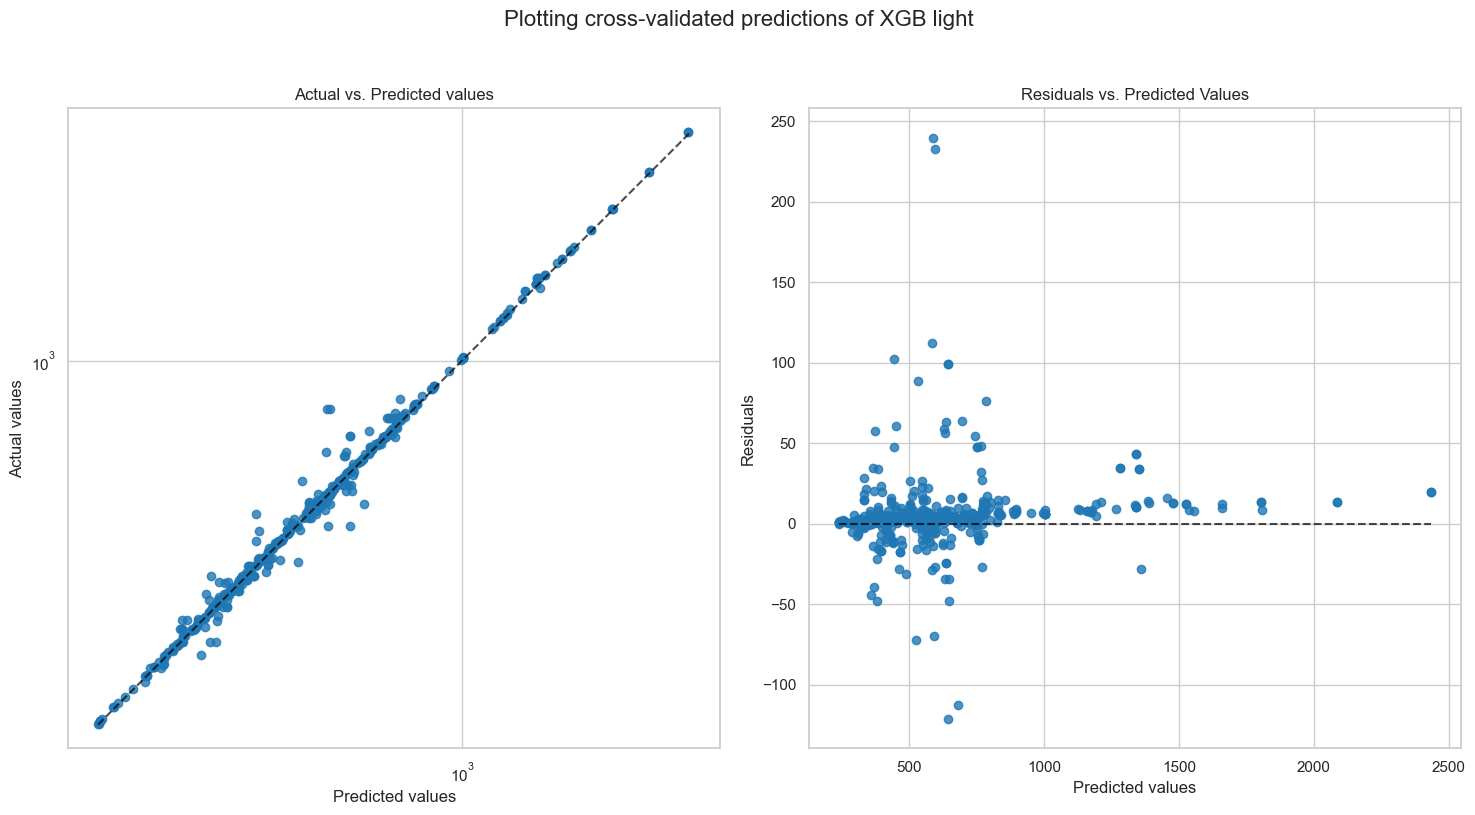

The mean residual of XGB light is: 4.230963202297522


In [ ]:
plotPvA(randomForest_final, "Random Forest", X_osample, y_osample)
plotPvA(randomForest_light_final, "Random Forest light", X_osample, y_osample)

plotPvA(xgb_final, "XGB", X_osample, y_osample)
plotPvA(xgb_light_final, "XGB light", X_osample, y_osample)

## 12 Safe models


In [ ]:
# Specify the file path where you want to save the model

folder='models/test'
models_to_safe = [decisionTree_final, randomForest_final, knn_final, xgb_final, svm_final]

def safeModel(models, folder):
    os.makedirs(folder, exist_ok=True)  # Create directory if it doesn't exist
    for model in models:
        path = folder+f'/{model.steps[-1][1].__class__.__name__}.joblib'
        #with open(path, 'wb') as f:
        dump(model, path) 


In [ ]:
safeModel(models,folder)

## 13 Debugging library versions

In [ ]:
import sklearn
sklearn.__version__
if(sklearn.__version__!="1.2.2"):
    try:
        !pip install --upgrade numpy
        !pip install --upgrade pandas
        !pip install --upgrade scikit-learn
    except:
        print("Check your Python version. Has to be >3.8!")
        import sys
        print(sys.version)
